In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as mt
import os
from scipy import stats as st
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
os.getcwd()

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/Codes python 2/2. Estandarizacion y Transformacion'

## CARGA DEL DATAFRAME CON DATOS DIARIOS Y DE EVENTO DE SALUD

In [3]:
# creacion de variables con las rutas de ubicacion de los archivos y documentos para cambiar de directorio en la medida sea requerido
ruta_base = '/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/'
folder = 'BD procesada y sample/'
folder_next = 'version 2'

In [4]:
print(ruta_base+folder)
nueva_ruta = ruta_base+folder+folder_next
os.chdir(nueva_ruta)
os.getcwd()

/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/


'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2'

In [5]:
os.listdir()

['df_preprocesado_target_real_knn_code2.csv',
 'df_feature_selection_code2.csv',
 'df_con_movil_diff_imputed.csv',
 'df_sample_imputed_knn_code2.csv',
 '.DS_Store',
 'df_preprocesado_target_real_knn.csv',
 'df_feature_selection.csv',
 'df_sample_knn.csv',
 'df_preprocesado_target_real_con_nan.csv',
 'df_con_target_and_cols_utils.csv',
 'df_sample_original_con_nan.csv',
 'df_preprocesado_target_real_code2.csv']

In [6]:
df = pd.read_csv("df_con_target_and_cols_utils.csv", sep= ";", decimal= ",", date_format= "%Y-%m-%d")
df

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/535619358.py:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_con_target_and_cols_utils.csv", sep= ";", decimal= ",", date_format= "%Y-%m-%d")


,Fecha_dia,N° de la Vaca,Fecha de nacimiento,Estado de Lactancia,Grupo actual,Cantidad de Inseminaciones,Nº de Celos del Sistema,Días secos de lactancia anterior,code_lac,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Punto de Ordeño,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE
0,2021-10-01,5669658,2011-10-17,Sin Celo,Lote Desecho,1.0,2.0,66.0,5669658-9-2021-07-27,2021-07-27,Facil,9.0,Manana,19.0,21.020,34.240002,1.326260,5.6,720.0,1980.0,2040.0,2160.0,1620.0,3.06,00:07:30,2.366229,2.322429,05:32:25,00:08:53,16.0,3.5,NaN,NaN,100.000000,8.0,0.0,13.0,NaN,NaN,NaN
1,2021-10-01,5669658,2011-10-17,Sin Celo,Lote Desecho,1.0,2.0,66.0,5669658-9-2021-07-27,2021-07-27,Facil,9.0,Tarde,5.0,13.220,34.240002,1.326260,5.4,300.0,540.0,600.0,600.0,240.0,2.94,00:14:20,1.735667,-3.074714,16:20:44,00:07:37,130.0,17.2,NaN,NaN,96.906667,8.0,0.0,13.0,NaN,NaN,NaN
2,2021-10-01,6280882,2014-09-04,Lista,Eliminadas,2.0,7.0,61.0,6280882-7-2021-08-12,2021-08-12,Facil,7.0,Manana,23.0,19.180,34.040001,-0.086356,5.5,1470.0,2700.0,2940.0,3180.0,120.0,4.02,00:04:30,2.688785,1.695714,06:55:33,00:07:08,25.0,4.8,NaN,NaN,100.000000,3.0,0.0,7.0,NaN,NaN,NaN
3,2021-10-01,6280882,2014-09-04,Lista,Eliminadas,2.0,7.0,61.0,6280882-7-2021-08-12,2021-08-12,Facil,7.0,Tarde,18.0,14.860,34.040001,-0.172265,0.0,2370.0,2520.0,3000.0,3300.0,120.0,3.78,00:03:00,2.669461,1.588571,18:02:26,00:05:34,36.0,5.4,NaN,NaN,100.000000,3.0,0.0,7.0,NaN,NaN,NaN
4,2021-10-01,6281046,2014-04-15,Antes,Eliminadas,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.910,31.320000,NaN,5.0,1800.0,2340.0,3180.0,3600.0,120.0,4.08,00:03:10,2.705600,5.940000,05:40:28,00:06:15,32.0,5.4,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095902,2024-03-11,19444641,2021-11-15,Preñada,Lote Ordeña Lote 1,1.0,2.0,NaN,19444641-1-2023-09-29,2023-09-29,Facil,1.0,Tarde,NaN,NaN,7.527000,1.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.255857,NaN,NaN,NaN,NaN,182.0,227.0,95.796667,0.0,0.0,0.0,NaN,NaN,NaN
1095903,2024-03-11,19444650,2021-11-24,Preñada,Lote Ordeña Lote 1,1.0,1.0,NaN,19444650-1-2023-09-20,2023-09-20,Facil,1.0,Manana,10.0,7.567,7.567000,1.033592,5.3,90.0,1560.0,2040.0,2460.0,120.0,2.76,00:01:30,1.838138,-1.622571,06:26:01,00:04:07,46.0,3.6,121.0,193.0,89.115083,0.0,0.0,0.0,NaN,NaN,NaN
1095904,2024-03-11,19444650,2021-11-24,Preñada,Lote Ordeña Lote 1,1.0,1.0,NaN,19444650-1-2023-09-20,2023-09-20,Facil,1.0,Tarde,NaN,NaN,7.567000,1.033592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.961143,NaN,NaN,NaN,NaN,121.0,193.0,93.553500,0.0,0.0,0.0,NaN,NaN,NaN
1095905,2024-03-11,19444665,2021-12-04,Preñada,Lote Ordeña Lote 1,1.0,5.0,NaN,19444665-1-2023-08-20,2023-08-20,Leve Ayuda,1.0,Manana,27.0,8.465,8.465000,1.351351,5.5,1620.0,3240.0,3960.0,4200.0,240.0,4.20,00:02:00,2.407109,5.987714,06:13:34,00:03:31,72.0,6.1,113.0,203.0,100.000000,0.0,0.0,0.0,NaN,NaN,NaN


In [7]:
df.drop(["Grupo actual"], axis=1, inplace=True)

## TRANSFORMACION DE COLUMNAS EXISTENTES

In [11]:
# Identificacion de la columnas Fechas
df.filter(like="Fe").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095907 entries, 0 to 1095906
Data columns (total 3 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   Fecha_dia                   1095907 non-null  object
 1   Fecha de nacimiento         1095907 non-null  object
 2   Fecha del Ultimo Parto_lac  1095907 non-null  object
dtypes: object(3)
memory usage: 25.1+ MB


In [12]:
# Transformacion de las columnas Fechas objetc a Fechas datetime de pandas
for col in df.filter(like="Fe").columns:
    print(col)
    df[col] = pd.to_datetime(df[col], errors="coerce")

Fecha_dia
Fecha de nacimiento
Fecha del Ultimo Parto_lac


In [13]:
# Verificacion de la existencia de valores nan luego de la transformacion de formato
df[df.filter(like="Fe").columns].isna().sum()

Fecha_dia                     0
Fecha de nacimiento           0
Fecha del Ultimo Parto_lac    0
dtype: int64

In [14]:
cols_date = []
cols_object = []
cols_float = []
cols_int = []
cols_others = []

for col in df.columns:
    #print(col)
    #print(df_utils[col].dtype)
    if df[col].dtype == "datetime64[ns]":
        cols_date.append(col)
    elif df[col].dtype == "object":
        cols_object.append(col)
    elif df[col].dtype == "float":
        cols_float.append(col)
    elif df[col].dtype == "int":
        cols_int.append(col)
    else:
        cols_others.append(col)
        
dicc_list = {"date": cols_date, "float": cols_float, "int": cols_int, "object": cols_object, "others": cols_others}

In [15]:
df[dicc_list["object"]]

,Estado de Lactancia,code_lac,Modo del Ultimo Parto,Turno,Flujo Pico leche durante el Tiempo de ordeño,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,TIPO DE EVENTO
0,Sin Celo,5669658-9-2021-07-27,Facil,Manana,00:07:30,05:32:25,00:08:53,NaN
1,Sin Celo,5669658-9-2021-07-27,Facil,Tarde,00:14:20,16:20:44,00:07:37,NaN
2,Lista,6280882-7-2021-08-12,Facil,Manana,00:04:30,06:55:33,00:07:08,NaN
3,Lista,6280882-7-2021-08-12,Facil,Tarde,00:03:00,18:02:26,00:05:34,NaN
4,Antes,6281046-6-2021-09-25,Facil,Manana,00:03:10,05:40:28,00:06:15,NaN
...,...,...,...,...,...,...,...,...
1095902,Preñada,19444641-1-2023-09-29,Facil,Tarde,NaN,NaN,NaN,NaN
1095903,Preñada,19444650-1-2023-09-20,Facil,Manana,00:01:30,06:26:01,00:04:07,NaN
1095904,Preñada,19444650-1-2023-09-20,Facil,Tarde,NaN,NaN,NaN,NaN
1095905,Preñada,19444665-1-2023-08-20,Leve Ayuda,Manana,00:02:00,06:13:34,00:03:31,NaN


In [16]:
for col in ["Flujo Pico leche durante el Tiempo de ordeño ","Hora de inicio del Ordeño de la Vaca","Hora Individual del ordeño por Turno"]:
    print("Valores unicos en:", col,":", len(df[col].unique()) )

Valores unicos en: Flujo Pico leche durante el Tiempo de ordeño  : 651
Valores unicos en: Hora de inicio del Ordeño de la Vaca : 48780
Valores unicos en: Hora Individual del ordeño por Turno : 1230


In [17]:
# TRANSFORMACION DE LAS COLUMNAS CON TIEMPO INVOLUCRADO a SGDOS
df['sgdos al Pico de leche durante el Tiempo de ordeño'] = pd.to_timedelta(df['Flujo Pico leche durante el Tiempo de ordeño ']).dt.total_seconds()
df['duracion en sgdos total ordeño'] = pd.to_timedelta(df['Hora Individual del ordeño por Turno']).dt.total_seconds()
df['Hora inicio del ordeño en sgdos'] = pd.to_timedelta(df['Hora de inicio del Ordeño de la Vaca']).dt.total_seconds()

In [18]:
df["sgdos desde el pico al fin de ordeño"] = (df['duracion en sgdos total ordeño'] - df['sgdos al Pico de leche durante el Tiempo de ordeño'])
df["sgdos desde el pico al fin de ordeño"] 

0           83.0
1         -403.0
2          158.0
3          154.0
4          185.0
           ...  
1095902      NaN
1095903    157.0
1095904      NaN
1095905     91.0
1095906      NaN
Name: sgdos desde el pico al fin de ordeño, Length: 1095907, dtype: float64

In [19]:
indices = df[df["sgdos desde el pico al fin de ordeño"]<0].index
len(indices)

3553

In [21]:
df.loc[indices, ['Nº de Lactancia', 'Turno',"sgdos desde el pico al fin de ordeño","TIPO DE EVENTO"]].sort_values(by="TIPO DE EVENTO")

,Nº de Lactancia,Turno,sgdos desde el pico al fin de ordeño,TIPO DE EVENTO
13192,2.0,Manana,-183.0,Mastitis
320028,4.0,Manana,-152.0,Mastitis
777202,1.0,Manana,-492.0,Mastitis
883008,6.0,Tarde,-51.0,Mastitis
1,9.0,Tarde,-403.0,NaN
...,...,...,...,...
1092910,7.0,Tarde,-171.0,NaN
1093527,3.0,Manana,-10.0,NaN
1093695,2.0,Manana,-90.0,NaN
1094350,1.0,Tarde,-107.0,NaN


In [22]:
df.loc[indices, "sgdos desde el pico al fin de ordeño"].value_counts().reset_index().sort_values(by="sgdos desde el pico al fin de ordeño")

,sgdos desde el pico al fin de ordeño,count
614,-3212.0,1
613,-3104.0,1
537,-2680.0,1
597,-2073.0,1
621,-1870.0,1
...,...,...
276,-5.0,5
216,-4.0,7
326,-3.0,4
204,-2.0,7


In [23]:
df["sgdos desde el pico al fin de ordeño"].isna().sum()

128916

In [24]:
df.loc[indices, "sgdos desde el pico al fin de ordeño"] = np.nan

In [25]:
df["sgdos desde el pico al fin de ordeño"].isna().sum()

132469

In [26]:
cols_date = []
cols_object = []
cols_float = []
cols_int = []
cols_others = []

for col in df.columns:
    #print(col)
    #print(df_utils[col].dtype)
    if df[col].dtype == "datetime64[ns]":
        cols_date.append(col)
    elif df[col].dtype == "object":
        cols_object.append(col)
    elif df[col].dtype == "float":
        cols_float.append(col)
    elif df[col].dtype == "int":
        cols_int.append(col)
    else:
        cols_others.append(col)
        
dicc_list = {"date": cols_date, "float": cols_float, "int": cols_int, "object": cols_object, "others": cols_others}

## REVISION DE LA PROPORCION EN CADA NOP

In [28]:
df["Nº de Lactancia"].value_counts()

Nº de Lactancia
1.0     343484
2.0     255022
3.0     201340
4.0     157498
5.0      88914
6.0      35969
7.0       9658
10.0      2174
9.0       1110
8.0        738
Name: count, dtype: int64

In [29]:
df["Nº de Lactancia"].value_counts() / df["Nº de Lactancia"].value_counts().sum() * 100

Nº de Lactancia
1.0     31.342441
2.0     23.270405
3.0     18.371997
4.0     14.371475
5.0      8.113280
6.0      3.282122
7.0      0.881279
10.0     0.198374
9.0      0.101286
8.0      0.067341
Name: count, dtype: float64

In [30]:
mascara = ((df["Nº de Lactancia"].value_counts() / df["Nº de Lactancia"].value_counts().sum() * 100) < 3)
mascara = mascara[mascara == True]
min_nop = mascara.index.min()
min_nop

7.0

In [31]:
indices = df[df["Nº de Lactancia"] >= min_nop].index
print("Cantidad de registros a eliminar:", len(indices))
por_eliminar = len(indices) / df.shape[0] * 100
print("Porcentaje de registros a eliminar:", f'{por_eliminar: .2f}%')
print("")
print(df.loc[indices,["TIPO DE EVENTO","Turno","Nº de Lactancia"]].value_counts())
print("Q total de mastitis en los NOP:",df.loc[indices,["TIPO DE EVENTO","Turno","Nº de Lactancia"]].value_counts().sum())

Cantidad de registros a eliminar: 13680
Porcentaje de registros a eliminar:  1.25%

TIPO DE EVENTO  Turno   Nº de Lactancia
Mastitis        Manana  7.0                7
                Tarde   7.0                7
                Manana  9.0                1
                Tarde   9.0                1
Name: count, dtype: int64
Q total de mastitis en los NOP: 16


In [32]:
print("Forma del df antes de eliminar:", df.shape)

if por_eliminar < 5:
    print("Se eliminan los registros. Q de registros a eliminar es menor al 5%")
    df.drop(indices, inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(df.shape)


Forma del df antes de eliminar: (1095907, 43)
Se eliminan los registros. Q de registros a eliminar es menor al 5%
(1082227, 43)


## CREACION DE COLUMNAS CONSIDERADAS EN OTROS ESTUDIOS

#### Creacion de la columna Dias en leche al dia de la ordeña

In [35]:
df[["TIPO DE EVENTO","Turno"]].value_counts()

TIPO DE EVENTO  Turno 
Mastitis        Manana    674
                Tarde     674
Name: count, dtype: int64

In [36]:
df["dias_en_leche"] = (df["Fecha_dia"] - df["Fecha del Ultimo Parto_lac"]).dt.days

In [37]:
indices = df[df["dias_en_leche"]<0].index
print("Q de filas con DEL menor a 0:", len(indices))

Q de filas con DEL menor a 0: 378


In [38]:
## Eliminacion de los indices encontrados, ya que es una cantidad marginal (y además un resultado inconsistente)
df.drop(indices, inplace=True)

In [39]:
print("Valor maximo:", df["dias_en_leche"].max() )
q_99_del = df["dias_en_leche"].quantile(0.999)
print("Valor percentil 99:", q_99_del)

Valor maximo: 582
Valor percentil 99: 493.0


In [40]:
indices = df[df["dias_en_leche"] > q_99_del].index
print("Q de indices sobre lim. sup.:", len(indices))

Q de indices sobre lim. sup.: 1076


In [41]:
df.loc[indices, "TIPO DE EVENTO"].value_counts()

Series([], Name: count, dtype: int64)

In [42]:
## Eliminacion de los indices encontrados, ya que es una cantidad marginal (y además un resultado inconsistente)
df.drop(indices, inplace=True)
df.reset_index(drop=True, inplace=True)

## Creacion de la columna LIP (lapso inter parto)

In [44]:
# CREACION DEL DF QUE CONTIENE EL RESULTADO DEL LIP PARA CADA VACAS Y PARTO
df_lip = df.drop_duplicates("code_lac")
df_lip.reset_index(drop=True)
df_lip.sort_values(["code_lac","Fecha del Ultimo Parto_lac"], inplace=True)
df_lip.set_index("code_lac", inplace=True)
df_lip = df_lip.groupby(['N° de la Vaca'])['Fecha del Ultimo Parto_lac'].diff().dt.days.reset_index(name="lapso_dias_entre_partos")
df_lip

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/3175715478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lip.sort_values(["code_lac","Fecha del Ultimo Parto_lac"], inplace=True)


,code_lac,lapso_dias_entre_partos
0,10419926-4-2021-07-22,NaN
1,10419926-5-2022-07-27,370.0
2,10419933-4-2021-08-05,NaN
3,10419933-5-2022-07-29,358.0
4,10419933-6-2023-08-30,397.0
...,...,...
2259,6283087-4-2023-08-03,371.0
2260,9498101-4-2021-08-02,NaN
2261,9498101-5-2022-10-31,455.0
2262,9498101-6-2023-10-15,349.0


In [45]:
# UNION DEL DF ORIGINAL AL DF CON EL LIP CALCULADO EN BASE A LAS FECHAS DE PARTO
df = df.merge(df_lip, on="code_lac", how="left")

In [46]:
del(df_lip)

In [48]:
indices = df[df["lapso_dias_entre_partos"]<0].index
print("Q de filas con LIP menor a 0:", len(indices))

Q de filas con LIP menor a 0: 0


In [49]:
## Eliminacion de los indices encontrados, ya que es una cantidad marginal (y además un resultado inconsistente)
df.drop(indices, inplace=True)

In [50]:
print("Valor maximo:", df["lapso_dias_entre_partos"].max() )
q_99_del = df["lapso_dias_entre_partos"].quantile(0.999)
print("Valor percentil 99:", q_99_del)

Valor maximo: 539.0
Valor percentil 99: 519.0


In [51]:
indices = df[df["lapso_dias_entre_partos"] > q_99_del ].index
print("Q de filas con LIP mayor al lim.:", len(indices))

Q de filas con LIP mayor al lim.: 536


In [52]:
df.loc[indices, "TIPO DE EVENTO"].value_counts()

Series([], Name: count, dtype: int64)

In [53]:
## Eliminacion de los indices encontrados, ya que es una cantidad marginal (y además un resultado inconsistente)
df.drop(indices, inplace=True)

In [54]:
df.reset_index(drop=True, inplace=True)

## Creacion de la columna intervalo entre ordeñas en segundos

In [57]:
# UNION O SUMA ENTRE LA FECHA DEL DIA DE LA ORDEÑA Y EL TURNO MÁS LA HORA EN QUE INICIO LA ORDEÑA
df["Fecha y hora inicio ordeña"] = df["Fecha_dia"] + pd.to_timedelta(df['Hora inicio del ordeño en sgdos'], unit='s')
df["Fecha y hora inicio ordeña"]

0         2021-10-01 05:40:28
1         2021-10-01 16:35:54
2         2021-10-01 07:33:50
3         2021-10-01 18:17:03
4         2021-10-01 08:07:52
                  ...        
1080232                   NaT
1080233   2024-03-11 06:26:01
1080234                   NaT
1080235   2024-03-11 06:13:34
1080236                   NaT
Name: Fecha y hora inicio ordeña, Length: 1080237, dtype: datetime64[ns]

In [58]:
# VERIFICACION DEL PORQUE DE RESULTADOS NAN EN LA UNION ANTERIOR
indices = df[df["Fecha y hora inicio ordeña"].isna()].index
df.loc[indices, ["Fecha_dia","Fecha y hora inicio ordeña","Hora de inicio del Ordeño de la Vaca", 'Hora inicio del ordeño en sgdos']]

,Fecha_dia,Fecha y hora inicio ordeña,Hora de inicio del Ordeño de la Vaca,Hora inicio del ordeño en sgdos
15,2021-10-01,NaT,NaN,NaN
55,2021-10-01,NaT,NaN,NaN
66,2021-10-01,NaT,NaN,NaN
77,2021-10-01,NaT,NaN,NaN
81,2021-10-01,NaT,NaN,NaN
...,...,...,...,...
1080228,2024-03-11,NaT,NaN,NaN
1080230,2024-03-11,NaT,NaN,NaN
1080232,2024-03-11,NaT,NaN,NaN
1080234,2024-03-11,NaT,NaN,NaN


In [59]:
## Lo anterior se da porque la columna "Hora de inicio del Ordeño de la Vaca" no tiene valores (solo nan), por ende en la union da un resultado nan

In [60]:
# Reordenamiento del dataframe segun los criterios especificados para calcular en base a una columna con Fecha
df.sort_values([ "N° de la Vaca","Fecha_dia","Hora inicio del ordeño en sgdos","Nº de Lactancia"], ascending=[True, True, True, True], inplace=True)  

In [62]:
#SE OBSERA EL ORDEN CORRECTO PARA LA CREACION DE LA COLUMNA "INTERVARLO ENTRE ORDEÑA"
vc = random.choice(df["N° de la Vaca"].unique())
print(vc)
print(df[df["N° de la Vaca"]==vc]["Nº de Lactancia"].unique())
print(df[df["N° de la Vaca"]==vc]["Turno"].value_counts())
df[df["N° de la Vaca"]==vc]

6282523
[3. 4. 5.]
Turno
Manana    763
Tarde     763
Name: count, dtype: int64


,Fecha_dia,N° de la Vaca,Fecha de nacimiento,Estado de Lactancia,Cantidad de Inseminaciones,Nº de Celos del Sistema,Días secos de lactancia anterior,code_lac,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Punto de Ordeño,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Hora inicio del ordeño en sgdos,sgdos desde el pico al fin de ordeño,dias_en_leche,lapso_dias_entre_partos,Fecha y hora inicio ordeña
246,2021-10-01,6282523,2017-08-28,Lista,1.0,4.0,72.0,6282523-3-2021-07-19,2021-07-19,Dificil,3.0,Manana,25.0,11.050,20.000000,-0.384246,0.0,1560.0,1680.0,2580.0,2280.0,0.0,3.42,00:03:40,1.910663,-1.424857,07:24:02,00:05:47,35.0,3.9,NaN,NaN,95.779880,2.0,0.0,4.0,NaN,NaN,NaN,220.0,347.0,26642.0,127.0,74,NaN,2021-10-01 07:24:02
247,2021-10-01,6282523,2017-08-28,Lista,1.0,4.0,72.0,6282523-3-2021-07-19,2021-07-19,Dificil,3.0,Tarde,10.0,8.950,20.000000,5.680600,5.2,2040.0,2340.0,2640.0,2760.0,120.0,3.18,00:01:50,2.275424,-2.672000,17:26:26,00:03:56,51.0,4.6,NaN,NaN,95.764523,2.0,0.0,4.0,NaN,NaN,NaN,110.0,236.0,62786.0,126.0,74,NaN,2021-10-01 17:26:26
1020,2021-10-02,6282523,2017-08-28,Lista,1.0,4.0,72.0,6282523-3-2021-07-19,2021-07-19,Dificil,3.0,Manana,21.0,12.170,22.320999,5.680600,5.3,1170.0,1740.0,2400.0,2820.0,120.0,3.72,00:02:20,2.017127,-1.487714,07:26:33,00:06:02,34.0,4.2,NaN,NaN,97.405714,2.0,0.0,4.0,NaN,NaN,NaN,140.0,362.0,26793.0,222.0,75,NaN,2021-10-02 07:26:33
1021,2021-10-02,6282523,2017-08-28,Lista,1.0,4.0,72.0,6282523-3-2021-07-19,2021-07-19,Dificil,3.0,Tarde,NaN,10.151,22.320999,5.680600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052429,NaN,00:00:00,NaN,NaN,NaN,NaN,97.548643,2.0,0.0,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,75,NaN,NaT
1799,2021-10-03,6282523,2017-08-28,Lista,1.0,4.0,72.0,6282523-3-2021-07-19,2021-07-19,Dificil,3.0,Tarde,23.0,10.250,22.341999,3.194888,4.9,2130.0,2940.0,2760.0,2580.0,120.0,3.72,00:02:20,2.320755,0.196143,17:34:45,00:04:25,51.0,5.3,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,140.0,265.0,63285.0,125.0,76,NaN,2021-10-03 17:34:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075694,2024-03-09,6282523,2017-08-28,Inseminada,1.0,4.0,78.0,6282523-5-2023-08-27,2023-08-27,Facil,5.0,Tarde,19.0,6.043,17.666000,-0.182149,5.0,1950.0,2940.0,3900.0,1680.0,240.0,3.90,00:01:00,2.294810,-1.247143,16:11:29,00:02:38,93.0,5.6,605.0,452.0,90.982179,0.0,0.0,0.0,NaN,NaN,NaN,60.0,158.0,58289.0,98.0,195,389.0,2024-03-09 16:11:29
1077513,2024-03-10,6282523,2017-08-28,Inseminada,1.0,4.0,78.0,6282523-5-2023-08-27,2023-08-27,Facil,5.0,Manana,13.0,11.391,18.857000,-1.544051,0.0,2070.0,3120.0,3000.0,4620.0,60.0,4.62,00:02:00,2.835934,-1.431571,06:49:02,00:04:01,56.0,6.4,569.0,472.0,91.496809,0.0,0.0,0.0,NaN,NaN,NaN,120.0,241.0,24542.0,121.0,196,389.0,2024-03-10 06:49:02
1077514,2024-03-10,6282523,2017-08-28,Inseminada,1.0,4.0,78.0,6282523-5-2023-08-27,2023-08-27,Facil,5.0,Tarde,30.0,7.466,18.857000,-0.641026,5.1,2640.0,3720.0,3660.0,1860.0,240.0,4.44,00:01:40,1

In [63]:
print(df.shape)
df.reset_index(drop=True, inplace=True)
# Creacion de una columna que contiene el indice de todo el dataframe para futuros usos
df.reset_index(inplace=True)
df

(1080237, 46)


,index,Fecha_dia,N° de la Vaca,Fecha de nacimiento,Estado de Lactancia,Cantidad de Inseminaciones,Nº de Celos del Sistema,Días secos de lactancia anterior,code_lac,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Punto de Ordeño,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Hora inicio del ordeño en sgdos,sgdos desde el pico al fin de ordeño,dias_en_leche,lapso_dias_entre_partos,Fecha y hora inicio ordeña
0,0,2024-02-21,999,2023-01-03,Calostro,0.0,0.0,NaN,999-1-2024-02-21,2024-02-21,NaN,1.0,Manana,1.0,13.268000,13.268000,NaN,0.0,1260.0,2820.0,2520.0,3060.0,120.0,3.48,00:03:10,2.248814,NaN,11:36:36,00:05:54,35.0,4.7,193.0,NaN,100.000000,0.0,0.0,0.0,NaN,NaN,NaN,190.0,354.0,41796.0,164.0,0,NaN,2024-02-21 11:36:36
1,1,2024-02-21,999,2023-01-03,Calostro,0.0,0.0,NaN,999-1-2024-02-21,2024-02-21,NaN,1.0,Tarde,NaN,NaN,13.268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,NaN,100.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaT
2,2,2021-10-01,6281046,2014-04-15,Antes,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.910000,31.320000,NaN,5.0,1800.0,2340.0,3180.0,3600.0,120.0,4.08,00:03:10,2.705600,5.940000,05:40:28,00:06:15,32.0,5.4,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,190.0,375.0,20428.0,185.0,6,NaN,2021-10-01 05:40:28
3,3,2021-10-01,6281046,2014-04-15,Antes,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Tarde,22.0,14.410000,31.320000,NaN,4.4,1470.0,2760.0,3780.0,2940.0,60.0,4.14,00:02:50,2.620000,10.454000,16:35:54,00:05:30,41.0,6.0,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,170.0,330.0,59754.0,160.0,6,NaN,2021-10-01 16:35:54
4,4,2021-10-02,6281046,2014-04-15,Antes,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.629999,30.360001,NaN,5.1,1830.0,3060.0,3300.0,3420.0,0.0,4.38,00:01:50,2.794958,6.792000,05:53:16,00:05:57,32.0,5.4,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,110.0,357.0,21196.0,247.0,7,NaN,2021-10-02 05:53:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080232,1080232,2024-03-08,19444667,2021-12-04,Inseminada,0.0,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Tarde,16.0,6.931000,14.851000,3.658537,5.2,570.0,1620.0,2040.0,2340.0,240.0,2.58,00:02:20,1.264012,-2.779000,21:18:43,00:05:29,46.0,3.2,644.0,568.0,92.291190,0.0,0.0,0.0,NaN,NaN,NaN,140.0,329.0,76723.0,189.0,129,NaN,2024-03-08 21:18:43
1080233,1080233,2024-03-09,19444667,2021-12-04,Inseminada,0.0,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Manana,27.0,9.595000,15.497000,3.658537,5.5,930.0,1920.0,2400.0,2820.0,240.0,2.94,00:01:30,1.782353,-0.736429,11:07:59,00:05:23,40.0,3.9,605.0,550.0,93.404667,0.0,0.0,0.0,NaN,NaN,NaN,90.0,323.0,40079.0,233.0,130,NaN,2024-03-09 11:07:59
1080234,1080234,2024-03-09,19444667,2021-12-04,Inseminada,0.0,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Tarde,28.0,5.902000,15.497000,3.658537,0.0,750.0,1620.0,1860.0,2280.0,60.0,2.28,00:02:00,1.362000,-1.602429,21:09:0

In [64]:
# Observacion del orden en la columna critica: "Fecha y hora inicio ordeña", ya que el calculo se hará con la fila anterior
print(df[["N° de la Vaca","Turno","Fecha y hora inicio ordeña"]]["Turno"].value_counts())
df[["N° de la Vaca","Nº de Lactancia","Turno","Fecha y hora inicio ordeña","Fecha_dia"]].tail(40)

Turno
Manana    540119
Tarde     540118
Name: count, dtype: int64


,N° de la Vaca,Nº de Lactancia,Turno,Fecha y hora inicio ordeña,Fecha_dia
1080197,19444667,1.0,Manana,NaT,2024-02-20
1080198,19444667,1.0,Tarde,NaT,2024-02-20
1080199,19444667,1.0,Tarde,2024-02-21 21:42:30,2024-02-21
1080200,19444667,1.0,Manana,NaT,2024-02-21
1080201,19444667,1.0,Manana,2024-02-22 12:01:57,2024-02-22
1080202,19444667,1.0,Tarde,2024-02-22 21:17:15,2024-02-22
1080203,19444667,1.0,Manana,2024-02-23 11:35:25,2024-02-23
1080204,19444667,1.0,Tarde,2024-02-23 21:14:33,2024-02-23
1080205,19444667,1.0,Manana,2024-02-24 11:44:27,2024-02-24
1080206,19444667,1.0,Tarde,2024-02-24 21:15:43,2024-02-24


In [65]:
print("Q de valores nan:", df.groupby('N° de la Vaca')['Fecha y hora inicio ordeña'].diff().dt.total_seconds().reset_index(name="lapso_sgdos_a_ordeña_ant")["lapso_sgdos_a_ordeña_ant"].isna().sum() )

df.groupby(['N° de la Vaca',"Nº de Lactancia"])['Fecha y hora inicio ordeña'].diff().dt.total_seconds().reset_index(name="lapso_sgdos_a_ordeña_ant").tail(40)

Q de valores nan: 235171


,index,lapso_sgdos_a_ordeña_ant
1080197,1080197,NaN
1080198,1080198,NaN
1080199,1080199,NaN
1080200,1080200,NaN
1080201,1080201,NaN
1080202,1080202,33318.0
1080203,1080203,51490.0
1080204,1080204,34748.0
1080205,1080205,52194.0
1080206,1080206,34276.0


In [66]:
# Creacion de un dataframe que contiene el lapso en segundos entre la fila actual y la fila anterior de la columna "Fecha y hora inicio ordeña"
print(df.shape)
df_IEO = df.groupby(['N° de la Vaca',"Nº de Lactancia"])['Fecha y hora inicio ordeña'].diff().dt.total_seconds().reset_index(name="lapso_sgdos_a_ordeña_ant")
df_IEO

(1080237, 47)


,index,lapso_sgdos_a_ordeña_ant
0,0,NaN
1,1,NaN
2,2,NaN
3,3,39326.0
4,4,47842.0
...,...,...
1080232,1080232,36750.0
1080233,1080233,49756.0
1080234,1080234,36064.0
1080235,1080235,51674.0


In [67]:
# Agregacion de la columna creada: "lapso_sgdos_a_ordeña_ant" al dataframe original
df = df.merge(df_IEO, on="index", how="left")
del(df_IEO)

In [68]:
indices = df[df["lapso_sgdos_a_ordeña_ant"]<=0].index
print("Q indices negativos:", len(indices) )

Q indices negativos: 0


In [69]:
if len(indices) > 0:
   
   df.drop(indices, inplace=True)
   df.drop("index", axis=1, inplace=True)
   df.reset_index(drop=True, inplace=True) 
   print(df.shape)
   print("Se eliminaron los indices negativos")

else:
    print("No hay indices negativos")

No hay indices negativos


In [70]:
vc = random.choice(df["N° de la Vaca"].unique())
print(vc)
print(df[df["N° de la Vaca"]==vc]["Nº de Lactancia"].unique())
print(df[df["N° de la Vaca"]==vc]["Turno"].value_counts())
df[df["N° de la Vaca"]==vc][['Fecha_dia',"Fecha y hora inicio ordeña","dias_en_leche",'lapso_sgdos_a_ordeña_ant',"Turno","Hora de inicio del Ordeño de la Vaca","Hora inicio del ordeño en sgdos"]].head(30)

16323454
[1. 2.]
Turno
Manana    797
Tarde     797
Name: count, dtype: int64


,Fecha_dia,Fecha y hora inicio ordeña,dias_en_leche,lapso_sgdos_a_ordeña_ant,Turno,Hora de inicio del Ordeño de la Vaca,Hora inicio del ordeño en sgdos
574649,2021-10-01,2021-10-01 12:22:29,74,NaN,Manana,12:22:29,44549.0
574650,2021-10-01,2021-10-01 22:57:02,74,38073.0,Tarde,22:57:02,82622.0
574651,2021-10-02,2021-10-02 12:29:06,75,48724.0,Manana,12:29:06,44946.0
574652,2021-10-02,2021-10-02 22:27:18,75,35892.0,Tarde,22:27:18,80838.0
574653,2021-10-03,NaT,76,NaN,Manana,NaN,NaN
574654,2021-10-03,NaT,76,NaN,Tarde,NaN,NaN
574655,2021-10-04,2021-10-04 12:39:59,77,NaN,Manana,12:39:59,45599.0
574656,2021-10-04,2021-10-04 22:01:43,77,33704.0,Tarde,22:01:43,79303.0
574657,2021-10-05,2021-10-05 21:58:26,78,86203.0,Tarde,21:58:26,79106.0
574658,2021-10-05,NaT,78,NaN,Manana,NaN,NaN


In [71]:
df["code_eve"] = df["N° de la Vaca"].astype(str)+["-"]+df["Nº de Lactancia"].astype(int).astype(str)+["-"]+df["Fecha_dia"].astype(str)+["-"]+df["Turno"]
df["code_eve"] = df["code_eve"].str.strip()
df["code_eve"]

0               999-1-2024-02-21-Manana
1                999-1-2024-02-21-Tarde
2           6281046-6-2021-10-01-Manana
3            6281046-6-2021-10-01-Tarde
4           6281046-6-2021-10-02-Manana
                       ...             
1080232     19444667-1-2024-03-08-Tarde
1080233    19444667-1-2024-03-09-Manana
1080234     19444667-1-2024-03-09-Tarde
1080235    19444667-1-2024-03-10-Manana
1080236     19444667-1-2024-03-10-Tarde
Name: code_eve, Length: 1080237, dtype: object

### Valor minimo en "lapso_sgdos_a_ordeña_ant"

In [73]:
sgdos_dia = 24*60*60
print("segundos al dia:", sgdos_dia)
print("valor minimo:", df["lapso_sgdos_a_ordeña_ant"].min())
print("fraccion de dia en el valor minimo del lapso", f' {df["lapso_sgdos_a_ordeña_ant"].min() / sgdos_dia : .3f}%')
p_0_001 = df["lapso_sgdos_a_ordeña_ant"].quantile(0.0004)
print("")
print("Percentil 0.001% =", p_0_001)
print(f"fraccion del dia en el limite: { round(p_0_001/sgdos_dia,3)}%")

segundos al dia: 86400
valor minimo: 1464.0
fraccion de dia en el valor minimo del lapso   0.017%

Percentil 0.001% = 25867.9984
fraccion del dia en el limite: 0.299%


In [74]:
print("Minimo de Q de horas entre ordeñas:", f'{df["lapso_sgdos_a_ordeña_ant"].min()/60/60: .2f} hrs')
print("Q de horas entre ordeñas en el p_0.001%:", f'{p_0_001/60/60: .2f} hrs')

Minimo de Q de horas entre ordeñas:  0.41 hrs
Q de horas entre ordeñas en el p_0.001%:  7.19 hrs


In [75]:
# IDENTIFICACION DE LOS VALORES NEGATIVOS EN LA COLUMNA "lapso_sgdos_a_ordeña_ant" (y eso no tiene sentido)

indices_min = df[df["lapso_sgdos_a_ordeña_ant"] < p_0_001].index
print("Q de indices menor al percentil:", len(indices_min))
print("1ros 15 indices:", df.loc[indices_min]["lapso_sgdos_a_ordeña_ant"].sort_values().to_list()[:15])
print("ults 15 indices:", df.loc[indices_min]["lapso_sgdos_a_ordeña_ant"].sort_values().to_list()[-15:])
print(df.loc[indices_min].groupby(df["Fecha_dia"].dt.month).size())
df.loc[indices_min][["code_eve","N° de la Vaca","Turno","Fecha y hora inicio ordeña","code_lac","lapso_sgdos_a_ordeña_ant"]].sort_values("lapso_sgdos_a_ordeña_ant")

Q de indices menor al percentil: 338
1ros 15 indices: [1464.0, 1480.0, 2895.0, 5254.0, 15038.0, 15264.0, 15287.0, 15338.0, 15509.0, 15790.0, 17580.0, 18025.0, 18987.0, 20231.0, 21204.0]
ults 15 indices: [25829.0, 25831.0, 25834.0, 25835.0, 25844.0, 25844.0, 25848.0, 25848.0, 25850.0, 25852.0, 25855.0, 25864.0, 25864.0, 25865.0, 25867.0]
Fecha_dia
1      13
4       4
5       2
6       1
7       1
8      42
9     153
10     19
11     30
12     73
dtype: int64


,code_eve,N° de la Vaca,Turno,Fecha y hora inicio ordeña,code_lac,lapso_sgdos_a_ordeña_ant
351140,6283049-3-2023-01-14-Tarde,6283049,Tarde,2023-01-14 00:00:54,6283049-3-2022-10-28,1464.0
743701,17215918-4-2023-01-14-Tarde,17215918,Tarde,2023-01-14 00:01:54,17215918-4-2022-09-02,1480.0
648585,16323667-1-2023-01-14-Tarde,16323667,Tarde,2023-01-14 00:03:33,16323667-1-2022-08-23,2895.0
731171,16323799-1-2023-01-14-Tarde,16323799,Tarde,2023-01-14 00:01:10,16323799-1-2022-08-16,5254.0
194141,6282503-3-2021-11-06-Tarde,6282503,Tarde,2021-11-06 16:09:46,6282503-3-2021-07-27,15038.0
...,...,...,...,...,...,...
701672,16323753-1-2022-08-24-Tarde,16323753,Tarde,2022-08-24 15:46:14,16323753-1-2022-08-22,25855.0
333271,6283010-4-2023-12-16-Tarde,6283010,Tarde,2023-12-16 15:35:28,6283010-4-2023-08-30,25864.0
847108,19443850-2-2023-09-08-Tarde,19443850,Tarde,2023-09-08 15:40:43,19443850-2-2023-08-09,25864.0
605826,16323536-3-2023-12-13-Tarde,16323536,Tarde,2023-12-13 15:42:22,16323536-3-2023-09-12,25865.0


In [76]:
#Eliminacion de valores bajo el percentil del 0.001 %
print("Indices a eliminar en el percentil inf:" ,len(indices_min))
print("Valor del percentil:", p_0_001)

Indices a eliminar en el percentil inf: 338
Valor del percentil: 25867.9984


In [77]:
df.loc[indices_min, ["TIPO DE EVENTO","Turno"]].value_counts()

Series([], Name: count, dtype: int64)

In [78]:
df.drop(indices_min, inplace=True)
df.reset_index(drop=True, inplace=True)

### Valor maximo en "lapso_sgdos_a_ordeña_ant"

In [79]:
sgdos_dia = 24*60*60
print("segundos al dia:", sgdos_dia)
print("valor maximo:", df["lapso_sgdos_a_ordeña_ant"].max())
print("dias en valor maximo", f'{df["lapso_sgdos_a_ordeña_ant"].max() / sgdos_dia: .2f} dias')
p_0_999 = df["lapso_sgdos_a_ordeña_ant"].quantile(0.9996)
print("")
print("Percentil 99%:", p_0_999)
print("dias en limite", f' {p_0_999 / sgdos_dia: .2f} dias')

segundos al dia: 86400
valor maximo: 12949454.0
dias en valor maximo  149.88 dias

Percentil 99%: 95590.1368000001
dias en limite   1.11 dias


In [80]:
print("maximo de Q de horas entre ordeñas:", f'{df["lapso_sgdos_a_ordeña_ant"].max()/60/60/24: .2f} dias')
print("Q de horas entre ordeñas en el p_99.9%:", f'{p_0_999/60/60: .2f} hrs')

maximo de Q de horas entre ordeñas:  149.88 dias
Q de horas entre ordeñas en el p_99.9%:  26.55 hrs


In [81]:
# IDENTIFICACION DE LOS VALORES NEGATIVOS EN LA COLUMNA "lapso_sgdos_a_ordeña_ant" (y eso no tiene sentido)

indices_max = df[df["lapso_sgdos_a_ordeña_ant"] > p_0_999].index
print("Q de indices en el percentil:", len(indices_max))
print("1ros 15:", df.loc[indices_max]["lapso_sgdos_a_ordeña_ant"].sort_values().to_list()[:15])
print("ults 15:", df.loc[indices_max]["lapso_sgdos_a_ordeña_ant"].sort_values().to_list()[-15:])
print(df.loc[indices_max].groupby(df["Fecha_dia"].dt.month).size())
df.loc[indices_max][["code_eve","N° de la Vaca","Turno","Fecha y hora inicio ordeña","code_lac","lapso_sgdos_a_ordeña_ant"]].sort_values("lapso_sgdos_a_ordeña_ant")

Q de indices en el percentil: 338
1ros 15: [95591.0, 95613.0, 95625.0, 95634.0, 95637.0, 95650.0, 95675.0, 95692.0, 95695.0, 95697.0, 95700.0, 95713.0, 95717.0, 95734.0, 95761.0]
ults 15: [827443.0, 1384493.0, 1901004.0, 2033872.0, 2295308.0, 2501396.0, 2507089.0, 2507345.0, 2990426.0, 3376669.0, 4634579.0, 7087663.0, 7820244.0, 12570866.0, 12949454.0]
Fecha_dia
1     15
2     22
3      8
4     12
5     14
6      3
7     32
8     76
9     58
10    32
11    28
12    38
dtype: int64


,code_eve,N° de la Vaca,Turno,Fecha y hora inicio ordeña,code_lac,lapso_sgdos_a_ordeña_ant
822,6281352-5-2022-02-27-Tarde,6281352,Tarde,2022-02-27 18:17:21,6281352-5-2021-07-15,95591.0
885272,19443906-2-2024-03-03-Tarde,19443906,Tarde,2024-03-03 17:56:16,19443906-2-2023-07-31,95613.0
357457,6283074-3-2022-08-16-Tarde,6283074,Tarde,2022-08-16 18:36:36,6283074-3-2022-08-01,95625.0
401919,16097856-3-2024-01-07-Tarde,16097856,Tarde,2024-01-07 18:06:31,16097856-3-2023-08-17,95634.0
121888,6282332-5-2023-11-01-Tarde,6282332,Tarde,2023-11-01 18:20:22,6282332-5-2023-08-01,95637.0
...,...,...,...,...,...,...
375922,11472867-3-2022-08-24-Manana,11472867,Manana,2022-08-24 08:08:43,11472867-3-2021-09-13,4634579.0
248624,6282644-4-2023-05-27-Tarde,6282644,Tarde,2023-05-27 17:10:50,6282644-4-2022-11-25,7087663.0
455431,16323177-3-2023-04-13-Manana,16323177,Manana,2023-04-13 05:30:20,16323177-3-2022-09-10,7820244.0
310421,6282764-3-2023-04-13-Manana,6282764,Manana,2023-04-13 05:31:10,6282764-3-2022-08-27,12570866.0


In [82]:
# Estos me da la impresión que son errores de registro en el sistema, donde no se ingresa fecha de secado y se van con el collar y regresan a ordeña como
## si continuaran en la misma lactancia
# Eliminacion de valores sobre el percentil del 0.999 %
print("Indices a eliminar en el percentil sup:" ,len(indices_max))
print("Valor del percentil:", p_0_999)

Indices a eliminar en el percentil sup: 338
Valor del percentil: 95590.1368000001


In [83]:
## AL PARECER VACAS CON MASTITIS EN AGUNOS CASOS LAS ORDEÑAN SOLO 1 VEZ AL DIA
df.loc[indices_max, ["TIPO DE EVENTO","Turno",]].value_counts()

TIPO DE EVENTO  Turno 
Mastitis        Tarde     10
                Manana     2
Name: count, dtype: int64

In [84]:
df.loc[indices_max, ["TIPO DE EVENTO","Turno","lapso_sgdos_a_ordeña_ant"]].sort_values("TIPO DE EVENTO").head(20)

,TIPO DE EVENTO,Turno,lapso_sgdos_a_ordeña_ant
192308,Mastitis,Tarde,97235.0
215993,Mastitis,Manana,136307.0
221334,Mastitis,Tarde,95914.0
231519,Mastitis,Tarde,96263.0
283692,Mastitis,Tarde,95782.0
404858,Mastitis,Tarde,95868.0
473102,Mastitis,Tarde,96709.0
519021,Mastitis,Tarde,96252.0
725634,Mastitis,Tarde,99167.0
896936,Mastitis,Tarde,95700.0


In [85]:
df.drop(indices_max, inplace=True)
df.reset_index(drop=True, inplace=True)

In [86]:
df[["TIPO DE EVENTO","Turno"]].value_counts()

TIPO DE EVENTO  Turno 
Mastitis        Manana    672
                Tarde     664
Name: count, dtype: int64

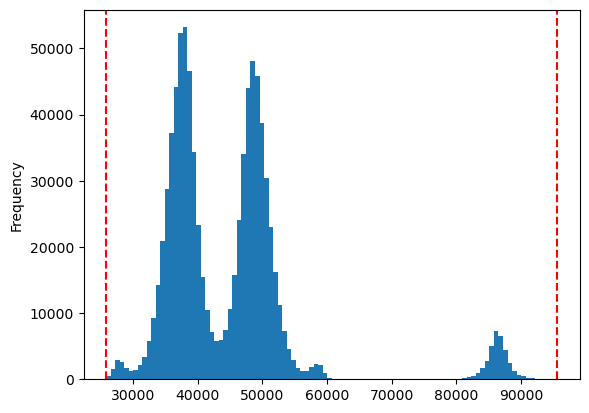

In [87]:
df["lapso_sgdos_a_ordeña_ant"].plot(kind="hist", bins=100)
plt.axvline(p_0_001, color="red", linestyle="--")
plt.axvline(p_0_999, color="red", linestyle="--")
plt.show()

In [88]:
#SE OBSERVA UN GRUPO DE ANIMALES TIENEN UN LAPSO ENTRE ORDEÑAS MAYOR A UN DIA (86400 SEGUNDOS)

In [89]:
sgdos_dia = 24*60*60
print("segundos al dia:", sgdos_dia)
print("valor maximo:", df["lapso_sgdos_a_ordeña_ant"].max())
print("dias en valor maximo", f'{df["lapso_sgdos_a_ordeña_ant"].max()/sgdos_dia: .2f} dias')
p_0_999 = df["lapso_sgdos_a_ordeña_ant"].quantile(0.9996)
print("")
print("Percentil 99%:", p_0_999)
print("dias en limite", f'{p_0_999 / sgdos_dia: .2f} dias')

segundos al dia: 86400
valor maximo: 95590.0
dias en valor maximo  1.11 dias

Percentil 99%: 91480.544
dias en limite  1.06 dias


In [90]:
print("maximo de Q de horas entre ordeñas:", f'{df["lapso_sgdos_a_ordeña_ant"].max()/60/60/24: .2f} dias')
print("Q de horas entre ordeñas en el p_99.9%:", f'{p_0_999/60/60: .2f} hrs')

maximo de Q de horas entre ordeñas:  1.11 dias
Q de horas entre ordeñas en el p_99.9%:  25.41 hrs


In [91]:
# IDENTIFICACION DE LOS VALORES NEGATIVOS EN LA COLUMNA "lapso_sgdos_a_ordeña_ant" (y eso no tiene sentido)

indices_max = df[df["lapso_sgdos_a_ordeña_ant"] > 65000].index
print("Q de indices:", len(indices_max))
print("1ros 15:", df.loc[indices_max]["lapso_sgdos_a_ordeña_ant"].sort_values().to_list()[:15])
print("ults 15:", df.loc[indices_max]["lapso_sgdos_a_ordeña_ant"].sort_values().to_list()[-15:])
print(df.loc[indices_max].groupby(df["Fecha_dia"].dt.month).size())
df.loc[indices_max][["code_eve","N° de la Vaca","Turno","Fecha y hora inicio ordeña","code_lac","lapso_sgdos_a_ordeña_ant"]].sort_values("lapso_sgdos_a_ordeña_ant")

Q de indices: 35888
1ros 15: [65065.0, 65087.0, 65155.0, 65189.0, 65201.0, 65346.0, 65356.0, 65414.0, 65468.0, 65488.0, 65541.0, 65567.0, 65575.0, 65584.0, 65608.0]
ults 15: [95302.0, 95305.0, 95333.0, 95337.0, 95347.0, 95364.0, 95388.0, 95397.0, 95410.0, 95512.0, 95551.0, 95571.0, 95575.0, 95577.0, 95590.0]
Fecha_dia
1     4735
2     4183
3     2769
4     2261
5     1769
6     1164
7     1094
8     2216
9     2759
10    3787
11    4433
12    4718
dtype: int64


,code_eve,N° de la Vaca,Turno,Fecha y hora inicio ordeña,code_lac,lapso_sgdos_a_ordeña_ant
477064,16323259-1-2021-12-03-Manana,16323259,Manana,2021-12-03 12:20:22,16323259-1-2021-07-19,65065.0
387971,13519973-1-2021-12-24-Manana,13519973,Manana,2021-12-24 12:15:38,13519973-1-2021-05-24,65087.0
491841,16323290-1-2021-12-04-Manana,16323290,Manana,2021-12-04 12:06:47,16323290-1-2021-07-24,65155.0
56004,6281675-6-2023-11-07-Manana,6281675,Manana,2023-11-07 11:13:21,6281675-6-2023-09-14,65189.0
882215,19443904-1-2022-09-07-Manana,19443904,Manana,2022-09-07 11:36:33,19443904-1-2022-07-16,65201.0
...,...,...,...,...,...,...
573140,16323447-1-2022-01-30-Tarde,16323447,Tarde,2022-01-30 18:31:01,16323447-1-2021-07-16,95551.0
436185,16323144-4-2023-12-30-Tarde,16323144,Tarde,2023-12-30 18:18:03,16323144-4-2023-10-01,95571.0
228572,6282588-5-2024-03-03-Tarde,6282588,Tarde,2024-03-03 17:55:29,6282588-5-2023-12-05,95575.0
776213,17216057-5-2022-11-25-Tarde,17216057,Tarde,2022-11-25 18:34:02,17216057-5-2022-10-06,95577.0


In [92]:
df.loc[indices_max, "Fecha_dia"].dt.year.value_counts()

Fecha_dia
2023    18378
2022    10348
2024     4859
2021     2303
Name: count, dtype: int64

In [93]:
#Eliminacion de valores con mas de 1 dia entre ordeñas
print("Indices a eliminar:" ,len(indices_max))
df.drop(indices_max, inplace=True)
df.reset_index(drop=True, inplace=True)

Indices a eliminar: 35888


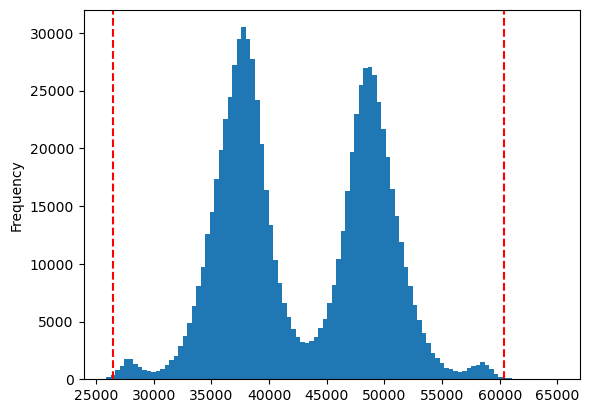

In [94]:
p_0_999 = df["lapso_sgdos_a_ordeña_ant"].quantile(0.9996)
p_0_001 = df["lapso_sgdos_a_ordeña_ant"].quantile(0.0004)
df["lapso_sgdos_a_ordeña_ant"].plot(kind="hist", bins=100)
plt.axvline(p_0_001, color="red", linestyle="--")
plt.axvline(p_0_999, color="red", linestyle="--")
plt.show()

In [95]:
vaca = random.choice(df["N° de la Vaca"])
print(vaca)

df[df["N° de la Vaca"]==vaca][["N° de la Vaca","Fecha y hora inicio ordeña","lapso_sgdos_a_ordeña_ant"]]

6282397


,N° de la Vaca,Fecha y hora inicio ordeña,lapso_sgdos_a_ordeña_ant
146948,6282397,2021-10-01 05:40:33,NaN
146949,6282397,2021-10-01 17:46:09,43536.0
146950,6282397,2021-10-02 07:20:31,48862.0
146951,6282397,2021-10-02 18:06:26,38755.0
146952,6282397,NaT,NaN
...,...,...,...
148463,6282397,2024-03-09 16:43:50,37953.0
148464,6282397,2024-03-10 05:42:38,46728.0
148465,6282397,2024-03-10 16:13:54,37876.0
148466,6282397,2024-03-11 05:58:26,49472.0


In [96]:
df[["TIPO DE EVENTO","Turno"]].value_counts()

TIPO DE EVENTO  Turno 
Mastitis        Manana    672
                Tarde     552
Name: count, dtype: int64

## Creacion de la columna Edad al día de la ordeña

In [97]:
df["edad_en_dias_al_ordeño"] = (df["Fecha_dia"] - df["Fecha de nacimiento"]).dt.days.values
df["edad_en_dias_al_ordeño"]

0           414
1           414
2          2726
3          2726
4          2727
           ... 
1043668     825
1043669     826
1043670     826
1043671     827
1043672     827
Name: edad_en_dias_al_ordeño, Length: 1043673, dtype: int64

In [98]:
df[df["edad_en_dias_al_ordeño"]<0]

,index,Fecha_dia,N° de la Vaca,Fecha de nacimiento,Estado de Lactancia,Cantidad de Inseminaciones,Nº de Celos del Sistema,Días secos de lactancia anterior,code_lac,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Punto de Ordeño,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Hora inicio del ordeño en sgdos,sgdos desde el pico al fin de ordeño,dias_en_leche,lapso_dias_entre_partos,Fecha y hora inicio ordeña,lapso_sgdos_a_ordeña_ant,code_eve,edad_en_dias_al_ordeño


In [99]:
print("valor maximo:", df["edad_en_dias_al_ordeño"].max())
p_0_999 = df["edad_en_dias_al_ordeño"].quantile(0.998)
print("Percentil 99%:", p_0_999.round(3))
print("años en limite", f'{(p_0_999/30.5)/12: .2f} años')

valor maximo: 12487
Percentil 99%: 2891.0
años en limite  7.90 años


In [100]:
indices = df[df["edad_en_dias_al_ordeño"]>p_0_999].index
print("Q de indices sobre el lim:", len(indices))
df.loc[indices, "edad_en_dias_al_ordeño"].reset_index().sort_values("edad_en_dias_al_ordeño")

Q de indices sobre el lim: 2082


,index,edad_en_dias_al_ordeño
0,329,2892
1953,351452,2892
543,16520,2892
542,16519,2892
502,15330,2892
...,...,...
1947,104273,12485
1948,104274,12486
1949,104275,12486
1951,104277,12487


In [101]:
df.loc[indices, "TIPO DE EVENTO"].value_counts()

Series([], Name: count, dtype: int64)

In [102]:
df.drop(indices, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,index,Fecha_dia,N° de la Vaca,Fecha de nacimiento,Estado de Lactancia,Cantidad de Inseminaciones,Nº de Celos del Sistema,Días secos de lactancia anterior,code_lac,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Punto de Ordeño,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Hora inicio del ordeño en sgdos,sgdos desde el pico al fin de ordeño,dias_en_leche,lapso_dias_entre_partos,Fecha y hora inicio ordeña,lapso_sgdos_a_ordeña_ant,code_eve,edad_en_dias_al_ordeño
0,0,2024-02-21,999,2023-01-03,Calostro,0.0,0.0,NaN,999-1-2024-02-21,2024-02-21,NaN,1.0,Manana,1.0,13.268000,13.268000,NaN,0.0,1260.0,2820.0,2520.0,3060.0,120.0,3.48,00:03:10,2.248814,NaN,11:36:36,00:05:54,35.0,4.7,193.0,NaN,100.000000,0.0,0.0,0.0,NaN,NaN,NaN,190.0,354.0,41796.0,164.0,0,NaN,2024-02-21 11:36:36,NaN,999-1-2024-02-21-Manana,414
1,1,2024-02-21,999,2023-01-03,Calostro,0.0,0.0,NaN,999-1-2024-02-21,2024-02-21,NaN,1.0,Tarde,NaN,NaN,13.268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,NaN,100.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaT,NaN,999-1-2024-02-21-Tarde,414
2,2,2021-10-01,6281046,2014-04-15,Antes,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.910000,31.320000,NaN,5.0,1800.0,2340.0,3180.0,3600.0,120.0,4.08,00:03:10,2.705600,5.940000,05:40:28,00:06:15,32.0,5.4,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,190.0,375.0,20428.0,185.0,6,NaN,2021-10-01 05:40:28,NaN,6281046-6-2021-10-01-Manana,2726
3,3,2021-10-01,6281046,2014-04-15,Antes,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Tarde,22.0,14.410000,31.320000,NaN,4.4,1470.0,2760.0,3780.0,2940.0,60.0,4.14,00:02:50,2.620000,10.454000,16:35:54,00:05:30,41.0,6.0,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,170.0,330.0,59754.0,160.0,6,NaN,2021-10-01 16:35:54,39326.0,6281046-6-2021-10-01-Tarde,2726
4,4,2021-10-02,6281046,2014-04-15,Antes,1.0,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.629999,30.360001,NaN,5.1,1830.0,3060.0,3300.0,3420.0,0.0,4.38,00:01:50,2.794958,6.792000,05:53:16,00:05:57,32.0,5.4,NaN,NaN,100.000000,2.0,0.0,4.0,NaN,NaN,NaN,110.0,357.0,21196.0,247.0,7,NaN,2021-10-02 05:53:16,47842.0,6281046-6-2021-10-02-Manana,2727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041586,1080232,2024-03-08,19444667,2021-12-04,Inseminada,0.0,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Tarde,16.0,6.931000,14.851000,3.658537,5.2,570.0,1620.0,2040.0,2340.0,240.0,2.58,00:02:20,1.264012,-2.779000,21:18:43,00:05:29,46.0,3.2,644.0,568.0,92.291190,0.0,0.0,0.0,NaN,NaN,NaN,140.0,329.0,76723.0,189.0,129,NaN,2024-03-08 21:18:43,36750.0,19444667-1-2024-03-08-Tarde,825
1041587,1080233,2024-03-09,19444667,2021-12-04,Inseminada,0.0,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Manana,27.0,9.595000,15.497000,3.658537,5.5,930.0,1920.0,2400.0,2820.0,240.0,2.94,00:01:30,1.782353,-0.736429,11:07:59,00:05:23,40.0,3.9,605.0,550.0,93.404667,0.0,0.0,0.0,NaN

## VISUALIZACION DE LOS VALORES NAN AUN PRESENTES EN CADA COLUMNA

In [103]:
df[["TIPO DE EVENTO","Turno"]].value_counts()

TIPO DE EVENTO  Turno 
Mastitis        Manana    672
                Tarde     552
Name: count, dtype: int64

In [104]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DEL TOTAL DE DATOS
df.groupby([df["Fecha_dia"].dt.year,df["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       10           24884
           11           27668
           12           30641
2022       1            31189
           2            28139
           3            31346
           4            29875
           5            23986
           6            15904
           7            13873
           8            25715
           9            29940
           10           38053
           11           40934
           12           44621
2023       1            45213
           2            41145
           3            45705
           4            42975
           5            37362
           6            23002
           7            17057
           8            29841
           9            40184
           10           49907
           11           51874
           12           55085
2024       1            55779
           2            51096
           3            18598
dtype: int64

In [105]:
# REVISION DE LAS COLUMNAS DEL DF Y SUS NAN EN PORCENTAJE
print( (df.isna().sum()/ df.shape[0]).sort_values(ascending=False)*100 )

PERÍODO DE RESGUARDO LECHE                                                               99.930011
DIAS DE TRATAMIENTO                                                                      99.911674
TIPO DE EVENTO                                                                           99.882487
lapso_dias_entre_partos                                                                  48.836635
Días secos de lactancia anterior                                                         31.927887
lapso_sgdos_a_ordeña_ant                                                                 22.542629
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    19.570638
Porcentaje de leche a los 2 minutos                                                      14.459706
Produccion de Leche a los 2 minutos                                                      14.425816
Flujo a los 120 segundos                                                                 13.984472
Flujo a lo

In [106]:
cols_del = ["Flujo Pico leche durante el Tiempo de ordeño ", #se elimina porque fue transformada a segundos
            "Hora de inicio del Ordeño de la Vaca", #se elimina porque fue transformada a segundos
            "Hora Individual del ordeño por Turno"] #se elimina porque fue transformada a segundos

#"Nombre de la alerta de ordeño activa", #no contiene informacion / "Inicio de la alerta de ordeño activa", #no contiene informacion

In [107]:
# SE ELIMINAN ESTAS COLUMNAS: UNAS INNECESARIAS Y OTRAS QUE FUERON TRANSFORMADAS A SEGUNDOS
df.drop(cols_del, axis=1, inplace=True)

In [108]:
# REVISION DE LAS DEMAS COLUMNAS DEL DF
print( (df.isna().sum()/ df.shape[0]).sort_values(ascending=False)*100 )

PERÍODO DE RESGUARDO LECHE                                                               99.930011
DIAS DE TRATAMIENTO                                                                      99.911674
TIPO DE EVENTO                                                                           99.882487
lapso_dias_entre_partos                                                                  48.836635
Días secos de lactancia anterior                                                         31.927887
lapso_sgdos_a_ordeña_ant                                                                 22.542629
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    19.570638
Porcentaje de leche a los 2 minutos                                                      14.459706
Produccion de Leche a los 2 minutos                                                      14.425816
Flujo a los 120 segundos                                                                 13.984472
Flujo a lo

## VISUALIZACION DE LA DISTRIBUCION DE LAS VARIABLES

In [109]:
cols_date = []
cols_object = []
cols_float = []
cols_int = []
cols_others = []

for col in df.columns:
    #print(col)
    #print(df_utils[col].dtype)
    if df[col].dtype == "datetime64[ns]":
        cols_date.append(col)
    elif df[col].dtype == "object":
        cols_object.append(col)
    elif df[col].dtype == "float":
        cols_float.append(col)
    elif df[col].dtype == "int":
        cols_int.append(col)
    else:
        cols_others.append(col)
        
dicc_list = {"date": cols_date, "float": cols_float, "int": cols_int, "object": cols_object, "others": cols_others}

In [110]:
for key in dicc_list.keys():
    print("- clave:" , key)
    print(df[dicc_list[key]].columns.to_list())
    print("")

- clave: date
['Fecha_dia', 'Fecha de nacimiento', 'Fecha del Ultimo Parto_lac', 'Fecha y hora inicio ordeña']

- clave: float
['Cantidad de Inseminaciones', 'Nº de Celos del Sistema', 'Días secos de lactancia anterior', 'Nº de Lactancia', 'Punto de Ordeño', 'Porduccion del Turno', 'Leche Diaria', 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos', 'Coductividad Maxima 1', 'Flujo a los 15 segundos', 'Flujo a los 30 segundos', 'Flujo a los 60 segundos', 'Flujo a los 120 segundos', 'Flujo de leche al retiro', 'Flujo Pico leche durante el ordeño', 'Flujo Promedio leche durante el ordeño', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal', 'Porcentaje de leche a los 2 minutos', 'Produccion de Leche a los 2 minutos', 'Actividad Diaria', 'Ruminacion Diaria', 'Indice de Salud de Vacas en Ordeño', 'Eventos de Salud del sistema en la presente Lactancia', 'Eventos de Salud del sistema enlos ultimos 30 dias', 'Eventos de Salud del

## REVISION DE VALORES CEROS EN LAS COLUMNAS NUMERICAS DEL DATASET

In [111]:
# Visualizacion del dataset:
cols_checks = df.select_dtypes(include=["int","float"]).columns.to_list()

cols_checks.remove("N° de la Vaca")
cols_checks.remove('Punto de Ordeño')

n_ceros = {}

for i in cols_checks:
    ceros = df[df[i]==0.0].shape[0]
    n_ceros[i] = ceros
    
df_ceros = pd.DataFrame(n_ceros, index=["Q de ceros/col"]).T
df_ceros = df_ceros[df_ceros["Q de ceros/col"]>0]
df_ceros.sort_values("Q de ceros/col", ascending=False, inplace=True)
df_ceros.reset_index(names="columnas", inplace=True)
df_ceros["% de ceros"] = df_ceros["Q de ceros/col"]/df.shape[0]*100
df_ceros

,columnas,Q de ceros/col,% de ceros
0,Eventos de Salud del sistema enlos ultimos 30 ...,932154,89.493285
1,Eventos de Salud del sistema en la presente La...,366129,35.150937
2,Coductividad Maxima 1,321747,30.889956
3,Eventos de Salud del sistema enlos ultimos 365...,243482,23.375970
4,Cantidad de Inseminaciones,161870,15.540649
5,duracion en sgdos total ordeño,114054,10.949979
6,Flujo de leche al retiro,70276,6.746986
7,Flujo a los 15 segundos,21110,2.026707
8,Cambio máxima en la conductividad en desviacio...,9723,0.933476
9,Flujo a los 30 segundos,6908,0.663216


In [112]:
df_ceros["columnas"].to_list()[:3]

['Eventos de Salud del sistema enlos ultimos 30 dias',
 'Eventos de Salud del sistema en la presente Lactancia',
 'Coductividad Maxima 1']

In [113]:
lista_ceros_analizar = df_ceros["columnas"].to_list()[:2]
lista_ceros_analizar

['Eventos de Salud del sistema enlos ultimos 30 dias',
 'Eventos de Salud del sistema en la presente Lactancia']

In [114]:
lista_ceros_analizar = ['Eventos de Salud del sistema enlos ultimos 30 dias','Eventos de Salud del sistema en la presente Lactancia']
print("lista_ceros_analizar: \n", lista_ceros_analizar)

lista_ceros_analizar: 
 ['Eventos de Salud del sistema enlos ultimos 30 dias', 'Eventos de Salud del sistema en la presente Lactancia']


In [115]:
#ACCION (DECISION)
## se decide eliminar esta columna ya que contiene gran cantidad de ceros y no aporte varianza ni valor al modelo
df.drop(lista_ceros_analizar, axis=1, inplace=True)

In [116]:
# Visualizacion del dataset:
cols_checks = df.select_dtypes(include=["int","float"]).columns.to_list()

cols_checks.remove("N° de la Vaca")
cols_checks.remove('Punto de Ordeño')

n_ceros = {}

for i in cols_checks:
    ceros = df[df[i]==0.0].shape[0]
    n_ceros[i] = ceros
    
df_ceros = pd.DataFrame(n_ceros, index=["Q de ceros/col"]).T
df_ceros = df_ceros[df_ceros["Q de ceros/col"]>0]
df_ceros.sort_values("Q de ceros/col", ascending=False, inplace=True)
df_ceros.reset_index(names="columnas", inplace=True)
df_ceros["% de ceros"] = df_ceros["Q de ceros/col"]/df.shape[0]*100
df_ceros

,columnas,Q de ceros/col,% de ceros
0,Coductividad Maxima 1,321747,30.889956
1,Eventos de Salud del sistema enlos ultimos 365...,243482,23.375970
2,Cantidad de Inseminaciones,161870,15.540649
3,duracion en sgdos total ordeño,114054,10.949979
4,Flujo de leche al retiro,70276,6.746986
5,Flujo a los 15 segundos,21110,2.026707
6,Cambio máxima en la conductividad en desviacio...,9723,0.933476
7,Flujo a los 30 segundos,6908,0.663216
8,Flujo a los 60 segundos,5569,0.534663
9,dias_en_leche,2248,0.215824


In [117]:
df_ceros["columnas"].to_list()[:4]

['Coductividad Maxima 1',
 'Eventos de Salud del sistema enlos ultimos 365 dias',
 'Cantidad de Inseminaciones',
 'duracion en sgdos total ordeño']

In [118]:
lista_ceros_revisar = df_ceros["columnas"].to_list()[:4]
lista_ceros_revisar.remove("Eventos de Salud del sistema enlos ultimos 365 dias")
lista_ceros_revisar

['Coductividad Maxima 1',
 'Cantidad de Inseminaciones',
 'duracion en sgdos total ordeño']

In [119]:
print("lista_ceros_revisar: \n", lista_ceros_revisar)

lista_ceros_revisar: 
 ['Coductividad Maxima 1', 'Cantidad de Inseminaciones', 'duracion en sgdos total ordeño']


In [120]:
df[lista_ceros_revisar].head() #Se cuestiona porque tiene muchos ceros, cuando analiticamente no deberian tenerlos

,Coductividad Maxima 1,Cantidad de Inseminaciones,duracion en sgdos total ordeño
0,0.0,0.0,354.0
1,NaN,0.0,NaN
2,5.0,1.0,375.0
3,4.4,1.0,330.0
4,5.1,1.0,357.0


## REVISION DE LOS CASOS UNO A UNO (COLUMNAS)

In [121]:
# "Coductividad Maxima 1"
index = 0
print(f' "{lista_ceros_revisar[index]}" ')
print("forma del df original:", df.shape)
print("forma del df solo ceros:", df[df[lista_ceros_revisar[index]]==0].shape)
print("- Corresponde a:", round((df[df[lista_ceros_revisar[index]]==0].shape[0] / df.shape[0])*100, 2), "%")
print("- Q de valores unicos:", len(df[lista_ceros_revisar[index]].sort_values().unique() ) )

 "Coductividad Maxima 1" 
forma del df original: (1041591, 45)
forma del df solo ceros: (321747, 45)
- Corresponde a: 30.89 %
- Q de valores unicos: 142


In [122]:
print(f' "{lista_ceros_revisar[index]}" ')
df[df[lista_ceros_revisar[index]]==0].groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size() / df.groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size()*100

 "Coductividad Maxima 1" 


Fecha_dia  Fecha_dia
2021       10           30.638161
           11           30.837068
           12           29.170066
2022       1            28.898009
           2            28.423185
           3            27.292158
           4            26.811715
           5            27.094972
           6            29.175050
           7            29.315937
           8            29.963057
           9            32.571810
           10           32.036896
           11           28.985684
           12           29.811076
2023       1            29.108885
           2            29.537003
           3            31.160705
           4            29.968586
           5            29.302500
           6            28.884445
           7            28.604092
           8            30.424584
           9            31.196496
           10           35.247560
           11           36.627212
           12           35.296360
2024       1            32.508650
           2            33.

In [123]:
# DECISION:
## Al observar la distribucion temporal, esta se distribuye equitativamente en todo el tiempo alrededor del 30%
## por ende se interpreta como una condicion normal la presencia de ceros en la variable

In [124]:
# "Cantidad de Inseminaciones"
index = 1
print(f' "{lista_ceros_revisar[index]}" ')
print("forma del df original:", df.shape)
print("forma del df solo ceros:", df[df[lista_ceros_revisar[index]]==0].shape)
print("- Corresponde a:", round((df[df[lista_ceros_revisar[index]]==0].shape[0] / df.shape[0])*100, 2), "%")
print("- Q de valores unicos:", len(df[lista_ceros_revisar[index]].sort_values().unique() ) )

 "Cantidad de Inseminaciones" 
forma del df original: (1041591, 45)
forma del df solo ceros: (161870, 45)
- Corresponde a: 15.54 %
- Q de valores unicos: 6


In [125]:
print(f' "{lista_ceros_revisar[index]}" ')
(df[df[lista_ceros_revisar[index]]==0].groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size() / df.groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size()*100)

 "Cantidad de Inseminaciones" 


Fecha_dia  Fecha_dia
2021       10            4.657611
           11           11.417522
           12           17.156751
2022       1            18.561031
           2            18.739117
           3            18.790276
           4            19.059414
           5            24.697740
           6            35.500503
           7            40.741008
           8             9.321408
           9             2.895792
           10            4.751268
           11            8.181463
           12           12.583761
2023       1            14.281291
           2            14.653056
           3            14.764249
           4            14.750436
           5            17.689096
           6            27.875837
           7            37.245706
           8            19.345866
           9            11.793251
           10           11.994309
           11           13.696650
           12           15.919034
2024       1            17.029707
           2            16.

In [126]:
## OBSERVACION: tambien hay una distribucion temporal de la variable (no esta concentrada), por ende se puede entender la presencia de ceros como
## un efecto inherente al proceso. Por lo tanto se contrastara con la variable "dias en leche", ya que las mediciones son todos los dias (Fecha_dia)
## y al inicio de lactancia es evidente no presentar inseminaciones

       dias_en_leche       count
count     494.000000  494.000000
mean      246.500000    0.202429
std       142.749781    0.160694
min         0.000000    0.014209
25%       123.250000    0.033823
50%       246.500000    0.222401
75%       369.750000    0.357540
max       493.000000    0.441095


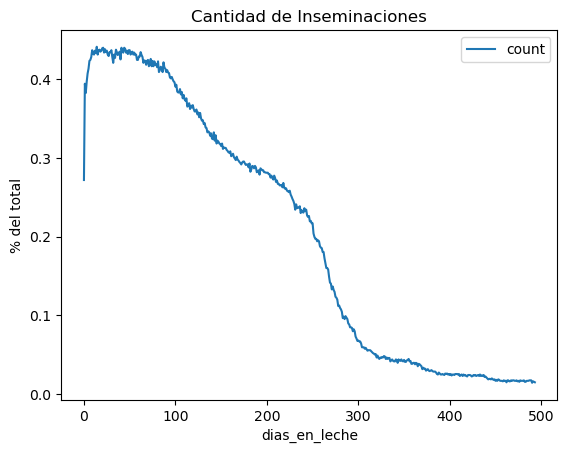

In [127]:
print((df[df[lista_ceros_revisar[index]]==0]["dias_en_leche"].value_counts() / df[df[lista_ceros_revisar[index]]==0]["dias_en_leche"].value_counts().sum()*100).reset_index().sort_values("dias_en_leche").describe())
(df[df[lista_ceros_revisar[index]]==0]["dias_en_leche"].value_counts() / df[df[lista_ceros_revisar[index]]==0]["dias_en_leche"].value_counts().sum()*100).reset_index().sort_values("dias_en_leche").plot(y ="count", x="dias_en_leche")
plt.title(lista_ceros_revisar[index])
plt.ylabel("% del total")
plt.show()

In [128]:
# OTRO ANALISIS PARALELO
df_ins0_y_del =(df[df[lista_ceros_revisar[index]]==0]["dias_en_leche"].value_counts() / df[df[lista_ceros_revisar[index]]==0]["dias_en_leche"].value_counts().sum()*100).reset_index().sort_values("dias_en_leche")
df_ins0_y_del.reset_index(drop=True, inplace=True)

In [129]:
print((round((df[ (df[lista_ceros_revisar[index]]==0) & (df["dias_en_leche"]>100)].shape[0] / df.shape[0])*100, 2)) )# * (df_ins0_y_del[df_ins0_y_del["dias_en_leche"]>100]["count"].sum()/100))
print("Lo anterior significa que un X.XX% de las vacas no se cubren antes de los 100 dias en leche")

8.91
Lo anterior significa que un X.XX% de las vacas no se cubren antes de los 100 dias en leche


In [130]:
# DECISION:
## Al analizar la distribucion de la presencia de ceros porcentual sobre los dias en leche, se observa que los ceros en la variable "cantidad de inseminaciones"
## es alta al inicio de la lactancia, lo que es evidente y disminuye en la medida avanzan los dias en leche.
## Por lo tanto tambien se considera que no es necesario realizar un trabajo sobre esta columna
## PERO DE IGUAL MANERA SE ELIMINA

<Axes: xlabel='Cantidad de Inseminaciones'>

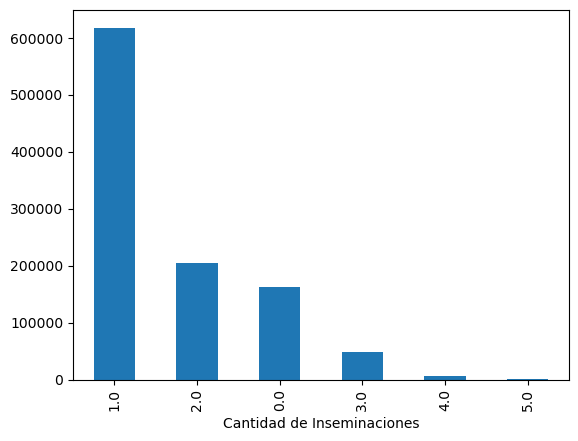

In [131]:
df[lista_ceros_revisar[1]].sort_values().value_counts().plot(kind="bar")

In [132]:
df.drop("Cantidad de Inseminaciones", axis=1, inplace=True)

In [134]:
# "duracion en sgdos total ordeño"
index = 2
print(f' "{lista_ceros_revisar[index]}" ')
print("forma del df original:", df.shape)
print("forma del df solo ceros:", df[df[lista_ceros_revisar[index]]==0].shape)
print("- Corresponde a:", round((df[df[lista_ceros_revisar[index]]==0].shape[0] / df.shape[0])*100, 2), "%")
print("- Q de valores unicos:", len(df[lista_ceros_revisar[index]].sort_values().unique() ) )

 "duracion en sgdos total ordeño" 
forma del df original: (1041591, 44)
forma del df solo ceros: (114054, 44)
- Corresponde a: 10.95 %
- Q de valores unicos: 1221


In [135]:
print(f' "{lista_ceros_revisar[index]}" ')
(df[df[lista_ceros_revisar[index]]==0].groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size() / df.groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size()*100)

 "duracion en sgdos total ordeño" 


Fecha_dia  Fecha_dia
2021       10            8.539624
           11            9.368223
           12            7.600927
2022       1             6.300298
           2             8.536195
           3             6.300644
           4             6.376569
           5             6.507963
           6             6.872485
           7             7.446118
           8             7.629788
           9            10.768203
           10           11.392006
           11           10.028338
           12           11.342193
2023       1            10.709309
           2            10.387653
           3            11.985560
           4            10.420012
           5            10.344735
           6            10.986001
           7            11.959899
           8            12.985490
           9            12.091877
           10           12.314906
           11           12.952539
           12           15.212853
2024       1            14.792305
           2            16.

In [136]:
## OBSERVACION: tambien hay una distribucion temporal de la variable (no esta concentrada), por ende se puede entender la presencia de ceros como
## un efecto inherente al proceso. Por lo tanto se contrastara otras variables

In [137]:
print(lista_ceros_revisar[index])
df[df[lista_ceros_revisar[index]]==0][["N° de la Vaca","Estado de  Lactancia","Nº de Lactancia","Porduccion del Turno","Leche Diaria","Coductividad Maxima 1","Flujo a los 15 segundos","Flujo a los 120 segundos","Flujo Promedio leche durante el ordeño","Produccion de Leche a los 2 minutos","Hora inicio del ordeño en sgdos","lapso_dias_entre_partos","Fecha y hora inicio ordeña"]]

duracion en sgdos total ordeño


,N° de la Vaca,Estado de Lactancia,Nº de Lactancia,Porduccion del Turno,Leche Diaria,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 120 segundos,Flujo Promedio leche durante el ordeño,Produccion de Leche a los 2 minutos,Hora inicio del ordeño en sgdos,lapso_dias_entre_partos,Fecha y hora inicio ordeña
31,6281046,Antes,6.0,15.215000,33.924999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
45,6281046,Antes,6.0,16.360001,36.389999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
71,6281046,Antes,6.0,17.771999,37.222000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
79,6281046,Antes,6.0,17.497000,37.437000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
81,6281046,Lista,6.0,17.465000,37.474998,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041530,19444667,Lista,1.0,6.925000,17.600000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1041551,19444667,Inseminada,1.0,9.285000,14.255000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1041552,19444667,Inseminada,1.0,4.970000,14.255000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1041554,19444667,Inseminada,1.0,9.307000,15.542000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [138]:
print("COLUMNA SELECCINADA (CEROS) Y VALORES NAN EN OTRAS COLUMNAS. LUEGO CUALES TIENEN MAS DE 75% DE NAN")
print(lista_ceros_revisar[index])
cols_mayores_a = (df[df[lista_ceros_revisar[index]]==0].isna().sum().sort_values(ascending=False) / df[df[lista_ceros_revisar[index]]==0].shape[0]*100) > 75
cols_mayores_a = cols_mayores_a[cols_mayores_a].index.to_list()
cols_mayores_a

COLUMNA SELECCINADA (CEROS) Y VALORES NAN EN OTRAS COLUMNAS. LUEGO CUALES TIENEN MAS DE 75% DE NAN
duracion en sgdos total ordeño


['Flujo Pico leche durante el ordeño',
 'sgdos desde el pico al fin de ordeño',
 'Flujo a los 30 segundos',
 'Flujo a los 15 segundos',
 'Flujo de leche al retiro',
 'sgdos al Pico de leche durante el Tiempo de ordeño',
 'Flujo a los 120 segundos',
 'Flujo Promedio leche durante el ordeño',
 'Hora inicio del ordeño en sgdos',
 'Porcentaje de leche a los 2 minutos',
 'Fecha y hora inicio ordeña',
 'lapso_sgdos_a_ordeña_ant',
 'Produccion de Leche a los 2 minutos',
 'Flujo a los 60 segundos',
 'PERÍODO DE RESGUARDO LECHE',
 'DIAS DE TRATAMIENTO',
 'TIPO DE EVENTO',
 'Punto de Ordeño']

In [139]:
df[df[lista_ceros_revisar[index]]==0][cols_mayores_a]

,Flujo Pico leche durante el ordeño,sgdos desde el pico al fin de ordeño,Flujo a los 30 segundos,Flujo a los 15 segundos,Flujo de leche al retiro,sgdos al Pico de leche durante el Tiempo de ordeño,Flujo a los 120 segundos,Flujo Promedio leche durante el ordeño,Hora inicio del ordeño en sgdos,Porcentaje de leche a los 2 minutos,Fecha y hora inicio ordeña,lapso_sgdos_a_ordeña_ant,Produccion de Leche a los 2 minutos,Flujo a los 60 segundos,PERÍODO DE RESGUARDO LECHE,DIAS DE TRATAMIENTO,TIPO DE EVENTO,Punto de Ordeño
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1041551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


       Nº de Lactancia      count
count         6.000000   6.000000
mean          3.500000  16.666667
std           1.870829  11.153643
min           1.000000   3.771021
25%           2.250000   9.611894
50%           3.500000  15.309853
75%           4.750000  20.792782
max           6.000000  35.276273


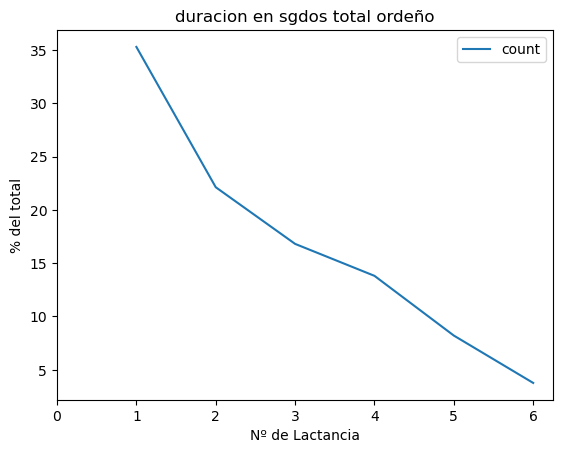

In [140]:
col = "Nº de Lactancia"
print((df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).describe())
(df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).plot(y ="count", x=col)
plt.title(lista_ceros_revisar[index])
plt.ylabel("% del total")
plt.xticks(np.arange(0, 7, 1))
plt.show()

       dias_en_leche       count
count     488.000000  488.000000
mean      249.500000    0.204918
std       141.017729    0.170828
min         6.000000    0.002630
25%       127.750000    0.014028
50%       249.500000    0.186754
75%       371.250000    0.383371
max       493.000000    0.454171


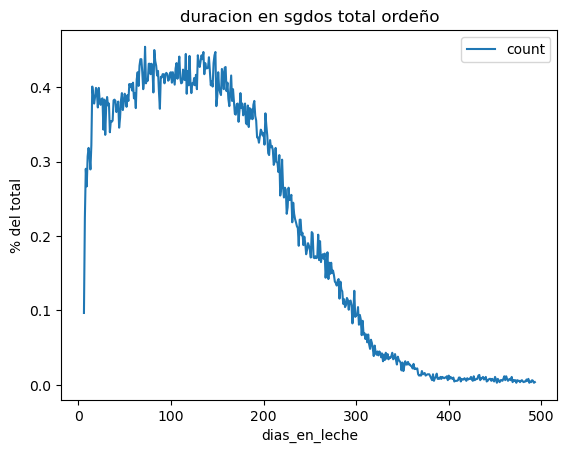

In [141]:
col = "dias_en_leche"
print((df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).describe())
(df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).plot(y ="count", x=col)
plt.title(lista_ceros_revisar[index])
plt.ylabel("% del total")
plt.show()

       Leche Diaria         count
count  26565.000000  26565.000000
mean      21.005481      0.003764
std        8.508488      0.002698
min        0.043000      0.000877
25%       14.120000      0.001754
50%       20.780001      0.003507
75%       27.593000      0.005261
max       59.361000      0.020166


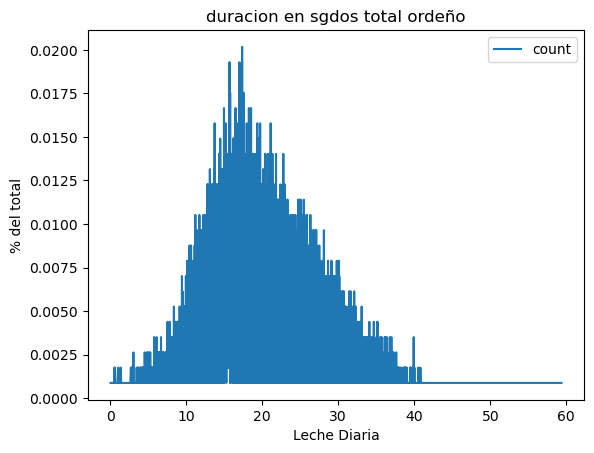

In [142]:
col = "Leche Diaria"
print((df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).describe())
(df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).plot(y ="count", x=col)
plt.title(lista_ceros_revisar[index])
plt.ylabel("% del total")
plt.show()

       Coductividad Maxima 1  count
count                    1.0    1.0
mean                     0.0  100.0
std                      NaN    NaN
min                      0.0  100.0
25%                      0.0  100.0
50%                      0.0  100.0
75%                      0.0  100.0
max                      0.0  100.0


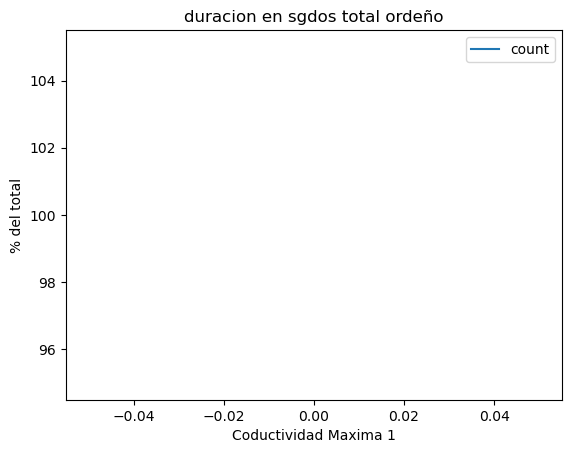

In [143]:
col = "Coductividad Maxima 1"
print((df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).describe())
(df[df[lista_ceros_revisar[index]]==0][col].value_counts() / df[df[lista_ceros_revisar[index]]==0][col].value_counts().sum()*100).reset_index().sort_values(col).plot(y ="count", x=col)
plt.title(lista_ceros_revisar[index])
plt.ylabel("% del total")
plt.show()

In [144]:
# DECISION:
## Al analizar la distribucion de la presencia de ceros porcentual sobre varias variables, se observa que a la vez hay valores nan en varias otras columnas asociadas al sensor... 
## ...que toma la medicion del tiempo de duracion de la ordeña y otras variables del proceso de extraccion (ej: flujos, conductividad, etc) no asi la produccion (a criterio personal)
## Se observa entonces 17 columnas con la misma cantidad de instancias con valores nan
## Por lo tanto son demasiados valores Nan presentes de manera simultanea para una imputacion, y como estan homogeneamente distribuidos en el tiempo se decide eliminarlos

In [145]:
print(df.shape)
indices = df[df[lista_ceros_revisar[index]]==0].index
print("Q de indices igual a cero (0):", len(indices), "en", lista_ceros_revisar[index])

(1041591, 44)
Q de indices igual a cero (0): 114054 en duracion en sgdos total ordeño


In [146]:
df.loc[indices, "Fecha_dia"].dt.year.value_counts() .sort_values()

Fecha_dia
2021     7046
2024    18904
2022    30621
2023    57483
Name: count, dtype: int64

In [147]:
print(df["TIPO DE EVENTO"].value_counts())
df.loc[indices, "TIPO DE EVENTO"].value_counts()

TIPO DE EVENTO
Mastitis    1224
Name: count, dtype: int64


TIPO DE EVENTO
Mastitis    437
Name: count, dtype: int64

In [148]:
df.loc[indices].groupby([df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month])["TIPO DE EVENTO"].value_counts()

Fecha_dia  Fecha_dia  TIPO DE EVENTO
2021       10         Mastitis          21
           11         Mastitis          10
           12         Mastitis           9
2022       1          Mastitis           8
           2          Mastitis           7
           3          Mastitis          10
           4          Mastitis           5
           5          Mastitis           7
           6          Mastitis           1
           7          Mastitis           3
           8          Mastitis          11
           9          Mastitis          29
           10         Mastitis          25
           11         Mastitis          23
           12         Mastitis          22
2023       1          Mastitis          13
           2          Mastitis           7
           3          Mastitis          14
           4          Mastitis          15
           5          Mastitis           6
           6          Mastitis           4
           7          Mastitis           6
           8     

In [149]:
indices = df.loc[indices][df.loc[indices, "TIPO DE EVENTO"].isna()].index
print("Q de indices:", len(indices), "en", lista_ceros_revisar[index],", excluyendo los casos de mastitis")

Q de indices: 113617 en duracion en sgdos total ordeño , excluyendo los casos de mastitis


In [150]:
df.drop(indices, inplace=True)
df.reset_index(drop=True, inplace=True)

In [151]:
df.groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size() #/ df.groupby([ df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size().mean()

Fecha_dia  Fecha_dia
2021       10           22780
           11           25086
           12           28321
2022       1            29232
           2            25744
           3            29381
           4            27975
           5            22432
           6            14812
           7            12843
           8            23764
           9            26745
           10           33743
           11           36852
           12           39582
2023       1            40384
           2            36878
           3            40241
           4            38512
           5            33503
           6            20479
           7            15023
           8            25982
           9            35376
           10           43789
           11           45191
           12           46721
2024       1            47538
           2            42735
           3            16330
dtype: int64

## REVISION Y/O ELIMINACION de outliers mediante percentiles (valores extremos)

In [154]:
# NO HACER = lapso_sgdos_a_ordeña_ant / edad_en_dias_al_ordeño / dias_en_leche / lapso_dias_entre_partos
## ya que al ser creadas fueron revisadas de inmediato en sus valores extremos

cols_revisar = ['Nº de Celos del Sistema','Días secos de lactancia anterior',
                
                'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos','Coductividad Maxima 1',
                
                'Flujo a los 15 segundos','Flujo a los 30 segundos','Flujo a los 60 segundos','Flujo a los 120 segundos','Flujo de leche al retiro',
                'Flujo Promedio leche durante el ordeño','Flujo Pico leche durante el ordeño',
                
                'sgdos al Pico de leche durante el Tiempo de ordeño','duracion en sgdos total ordeño',
                
                'Leche Diaria','Porduccion del Turno','Produccion de Leche a los 2 minutos','Porcentaje de leche a los 2 minutos',
                'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
                
                'Indice de Salud de Vacas en Ordeño','Ruminacion Diaria','Actividad Diaria','Eventos de Salud del sistema enlos ultimos 365 dias']

print(len(cols_revisar), "cols a revisar") 


cols_no_revisar = [elem for elem in df.select_dtypes(include=["int","float"]).columns.to_list() if elem not in cols_revisar]


print(len(cols_no_revisar), "cols no revisar")

22 cols a revisar
12 cols no revisar


In [155]:
df[cols_no_revisar].head()

,index,N° de la Vaca,Nº de Lactancia,Punto de Ordeño,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,Hora inicio del ordeño en sgdos,sgdos desde el pico al fin de ordeño,dias_en_leche,lapso_dias_entre_partos,lapso_sgdos_a_ordeña_ant,edad_en_dias_al_ordeño
0,0,999,1.0,1.0,NaN,NaN,41796.0,164.0,0,NaN,NaN,414
1,1,999,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,414
2,2,6281046,6.0,16.0,NaN,NaN,20428.0,185.0,6,NaN,NaN,2726
3,3,6281046,6.0,22.0,NaN,NaN,59754.0,160.0,6,NaN,39326.0,2726
4,4,6281046,6.0,16.0,NaN,NaN,21196.0,247.0,7,NaN,47842.0,2727


In [156]:
# REVISION DE LAS DEMAS COLUMNAS DEL DF
print( (df[cols_revisar].isna().sum()/ df[cols_revisar].shape[0]).sort_values(ascending=False)*100 )

Días secos de lactancia anterior                                                         31.479330
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    18.310750
Porcentaje de leche a los 2 minutos                                                       3.986534
Produccion de Leche a los 2 minutos                                                       3.948494
Flujo a los 120 segundos                                                                  3.453114
Flujo a los 60 segundos                                                                   2.495329
Flujo a los 30 segundos                                                                   2.107279
Flujo a los 15 segundos                                                                   1.908028
sgdos al Pico de leche durante el Tiempo de ordeño                                        1.322235
Flujo Pico leche durante el ordeño                                                        1.322235
Flujo Prom

In [157]:
# Creacion de una copia del df, y conservarlo para comparar luego de correr las sgtes celdas
df_orig = df.copy()
print("Forma del df orig:", df_orig.shape)
print("Forma del df:", df.shape)

Forma del df orig: (927974, 44)
Forma del df: (927974, 44)


In [158]:
indices_mastitis = df_orig[df_orig["TIPO DE EVENTO"]=="Mastitis"].index
print("Q de indices:", len(indices_mastitis))

Q de indices: 1224


In [159]:
df_mastitis = df_orig.loc[indices_mastitis]
df_mastitis.shape

(1224, 44)

In [182]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5
    mean = df_mastitis[col].mean()
    de = df_mastitis[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df_mastitis[df_mastitis[col] > l_s].shape[0]
    lim_inf = df_mastitis[df_mastitis[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df_mastitis[df_mastitis[col] > l_s].index
    index_i = df_mastitis[df_mastitis[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado.sort_values("total", ascending=False, inplace=True)
df_resultado

 Eliminar: 6 => "c1= 6" y "c2= 0") | col: "Nº de Celos del Sistema" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 2 => "c1= 2" y "c2= 0") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Diferencia entre el rendimiento de 

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
0,6,19.215352,6,-8.589535,0,Nº de Celos del Sistema
16,3,898.850817,0,101.644565,3,Ruminacion Diaria
4,2,26.972983,2,-22.649287,0,Cambio máxima en la conductividad en desviacio...
18,2,518.881385,2,-279.543846,0,sgdos al Pico de leche durante el Tiempo de or...
17,2,135.044775,0,50.309759,2,Indice de Salud de Vacas en Ordeño
13,1,4911.995050,1,-4733.777995,0,Porcentaje de leche a los 2 minutos
22,0,76173.761406,0,13103.805708,0,lapso_sgdos_a_ordeña_ant
21,0,444.537652,0,-281.707587,0,dias_en_leche
20,0,143288.581747,0,-58366.275896,0,Hora inicio del ordeño en sgdos
19,0,1276.716896,0,-809.638679,0,duracion en sgdos total ordeño


In [185]:
print("Q de indices a eliminar:", len(indices))
print(f' Se si aplica una eliminacion adicional por sobre {q} desv. est., se elimina un: {df_resultado["total"].sum() / df_mastitis.shape[0] *100}% del df')

Q de indices a eliminar: 16
 Se si aplica una eliminacion adicional por sobre 5 desv. est., se elimina un: 1.3071895424836601% del df


In [161]:
#ELiminar del df los indices de mastitis
df.drop(indices_mastitis, inplace=True)
df.drop("index", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Fecha_dia,N° de la Vaca,Fecha de nacimiento,Estado de Lactancia,Nº de Celos del Sistema,Días secos de lactancia anterior,code_lac,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Punto de Ordeño,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Hora inicio del ordeño en sgdos,sgdos desde el pico al fin de ordeño,dias_en_leche,lapso_dias_entre_partos,Fecha y hora inicio ordeña,lapso_sgdos_a_ordeña_ant,code_eve,edad_en_dias_al_ordeño
0,2024-02-21,999,2023-01-03,Calostro,0.0,NaN,999-1-2024-02-21,2024-02-21,NaN,1.0,Manana,1.0,13.268000,13.268000,NaN,0.0,1260.0,2820.0,2520.0,3060.0,120.0,3.48,2.248814,NaN,35.0,4.7,193.0,NaN,100.000000,0.0,NaN,NaN,NaN,190.0,354.0,41796.0,164.0,0,NaN,2024-02-21 11:36:36,NaN,999-1-2024-02-21-Manana,414
1,2024-02-21,999,2023-01-03,Calostro,0.0,NaN,999-1-2024-02-21,2024-02-21,NaN,1.0,Tarde,NaN,NaN,13.268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,NaN,100.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaT,NaN,999-1-2024-02-21-Tarde,414
2,2021-10-01,6281046,2014-04-15,Antes,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.910000,31.320000,NaN,5.0,1800.0,2340.0,3180.0,3600.0,120.0,4.08,2.705600,5.940000,32.0,5.4,NaN,NaN,100.000000,4.0,NaN,NaN,NaN,190.0,375.0,20428.0,185.0,6,NaN,2021-10-01 05:40:28,NaN,6281046-6-2021-10-01-Manana,2726
3,2021-10-01,6281046,2014-04-15,Antes,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Tarde,22.0,14.410000,31.320000,NaN,4.4,1470.0,2760.0,3780.0,2940.0,60.0,4.14,2.620000,10.454000,41.0,6.0,NaN,NaN,100.000000,4.0,NaN,NaN,NaN,170.0,330.0,59754.0,160.0,6,NaN,2021-10-01 16:35:54,39326.0,6281046-6-2021-10-01-Tarde,2726
4,2021-10-02,6281046,2014-04-15,Antes,3.0,70.0,6281046-6-2021-09-25,2021-09-25,Facil,6.0,Manana,16.0,16.629999,30.360001,NaN,5.1,1830.0,3060.0,3300.0,3420.0,0.0,4.38,2.794958,6.792000,32.0,5.4,NaN,NaN,100.000000,4.0,NaN,NaN,NaN,110.0,357.0,21196.0,247.0,7,NaN,2021-10-02 05:53:16,47842.0,6281046-6-2021-10-02-Manana,2727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926745,2024-03-08,19444667,2021-12-04,Inseminada,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Tarde,16.0,6.931000,14.851000,3.658537,5.2,570.0,1620.0,2040.0,2340.0,240.0,2.58,1.264012,-2.779000,46.0,3.2,644.0,568.0,92.291190,0.0,NaN,NaN,NaN,140.0,329.0,76723.0,189.0,129,NaN,2024-03-08 21:18:43,36750.0,19444667-1-2024-03-08-Tarde,825
926746,2024-03-09,19444667,2021-12-04,Inseminada,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Manana,27.0,9.595000,15.497000,3.658537,5.5,930.0,1920.0,2400.0,2820.0,240.0,2.94,1.782353,-0.736429,40.0,3.9,605.0,550.0,93.404667,0.0,NaN,NaN,NaN,90.0,323.0,40079.0,233.0,130,NaN,2024-03-09 11:07:59,49756.0,19444667-1-2024-03-09-Manana,826
926747,2024-03-09,19444667,2021-12-04,Inseminada,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Tarde,28.0,5.902000,15.497000,3.658537,0.0,750.0,1620.0,1860.0,2280.0,60.0,2.28,1.362000,-1.602429,56.0,3.4,605.0,550.0,91.596369,0.0,NaN,NaN,NaN,120.0,260.0,76143.0,140.0,130,NaN,2024-03-09 21:09:03,36064.0,19444667-1-2024-03-09-Tarde,826
926748,2024-03-10,19444667,2021-12-04,Inseminada,3.0,NaN,19444667-1-2023-10-31,2023-10-31,Facil,1.0,Manana,26.0,9.202000,15.3870

## ELIMINACION DE OUTLIERS MEDIANTE DESVIACIONES ESTANDAR

In [163]:
cols_eliminar = ["Punto de Ordeño", #NO ES UTIL
                 'Flujo de leche al retiro', #NO TIENE DISTRIBUCION
                 'sgdos desde el pico al fin de ordeño', #FUE CREADA PARA VERIFICAR QUE PICO DE LECHE ERAN MAYORES EN TIEMPO QUE LA "DURACION TOTAL DE ORDEÑO"
                 'lapso_dias_entre_partos', #EXCESO DE VALORES NAN (CASI 50%)
                 'code_eve', #NO ES UTIL, FUE CREADA PARA UNA UNION ESPECIFICA
                 'Fecha de nacimiento', #SE TRANSFORMO A EDAD EN DIAS AL ORDEÑO
                 'Estado de  Lactancia', #NO ES UTIL
                 'code_lac', #NO ES UTIL, FUE CREADA PARA UNA UNION ESPECIFICA
                 'Fecha y hora inicio ordeña'] #FUE CREADA PARA CALCULAR LAPSO ENTRE ORDEÑAS

In [164]:
df.drop(cols_eliminar, axis=1, inplace=True)

In [166]:
cols_checks = df.select_dtypes(include=["int","float"]).columns.to_list()

cols_no_checks = ["N° de la Vaca",'Nº de Celos del Sistema','Nº de Lactancia','Eventos de Salud del sistema enlos ultimos 365 dias', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE']

cols_checks = [elem for elem in cols_checks if elem not in cols_no_checks]
#  'dias_en_leche','edad_en_dias_al_ordeño'
print( len(cols_checks))
print(cols_checks)

23
['Días secos de lactancia anterior', 'Porduccion del Turno', 'Leche Diaria', 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos', 'Coductividad Maxima 1', 'Flujo a los 15 segundos', 'Flujo a los 30 segundos', 'Flujo a los 60 segundos', 'Flujo a los 120 segundos', 'Flujo Pico leche durante el ordeño', 'Flujo Promedio leche durante el ordeño', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal', 'Porcentaje de leche a los 2 minutos', 'Produccion de Leche a los 2 minutos', 'Actividad Diaria', 'Ruminacion Diaria', 'Indice de Salud de Vacas en Ordeño', 'sgdos al Pico de leche durante el Tiempo de ordeño', 'duracion en sgdos total ordeño', 'Hora inicio del ordeño en sgdos', 'dias_en_leche', 'lapso_sgdos_a_ordeña_ant', 'edad_en_dias_al_ordeño']


In [168]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5
    mean = df[col].mean()
    de = df[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df[df[col] > l_s].shape[0]
    lim_inf = df[df[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df[df[col] > l_s].index
    index_i = df[df[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado.sort_values("total", ascending=False, inplace=True)
df_resultado

 Eliminar: 1241 => "c1= 1241" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 448 => "c1= 448" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 87 => "c1= 87" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 2516 => "c1= 1900" y "c2= 616") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 16 => "c1= 16" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 508 => "c1= 508" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 109 => "c1= 109" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 36 => "c1= 36" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 23 => "c1= 23" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 46 => "c1= 46" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 59 => "c1= 59" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 4451 => "c1= 3009" y "c2= 1442") | col: "Diferencia entre el rendimiento de las ultimas 24 Horas y 

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
14,6088,1010.637834,4560,176.678258,1528,Actividad Diaria
11,4451,13.796866,3009,-13.792116,1442,Diferencia entre el rendimiento de las ultimas...
17,3040,479.805604,3040,-217.033792,0,sgdos al Pico de leche durante el Tiempo de or...
16,2800,116.576384,0,77.627981,2800,Indice de Salud de Vacas en Ordeño
3,2516,17.618052,1900,-15.021230,616,Cambio máxima en la conductividad en desviacio...
0,1241,165.571159,1241,-12.264126,0,Días secos de lactancia anterior
15,1050,860.460187,2,154.016324,1048,Ruminacion Diaria
5,508,5317.592083,508,-2895.323531,0,Flujo a los 15 segundos
1,448,28.749628,448,-8.551103,0,Porduccion del Turno
13,406,13.353056,406,-4.292211,0,Produccion de Leche a los 2 minutos


In [169]:
print("Q de indices a eliminar:", len(indices))
print(f' Se si aplica una eliminacion adicional por sobre {q} desv. est., se elimina un: {df_resultado["total"].sum() / df.shape[0] *100}% del df')

Q de indices a eliminar: 20740
 Se si aplica una eliminacion adicional por sobre 5 desv. est., se elimina un: 2.4809279741030483% del df


In [170]:
df.drop(indices, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(906010, 34)

In [171]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5
    mean = df[col].mean()
    de = df[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df[df[col] > l_s].shape[0]
    lim_inf = df[df[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df[df[col] > l_s].index
    index_i = df[df[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado.sort_values("total", ascending=False, inplace=True)
df_resultado

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 30 => "c1= 30" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 4 => "c1= 4" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 1274 => "c1= 819" y "c2= 455") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 79 => "c1= 79" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 3 => "c1= 3" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 6 => "c1= 6" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 11 => "c1= 11" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 2412 => "c1= 1462" y "c2= 950") | col: "Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal" 

 El

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
14,2835,952.335639,2282,231.452124,553,Actividad Diaria
11,2412,11.993494,1462,-12.014390,950,Diferencia entre el rendimiento de las ultimas...
3,1274,15.620628,819,-13.113665,455,Cambio máxima en la conductividad en desviacio...
17,1111,444.870169,1111,-185.376668,0,sgdos al Pico de leche durante el Tiempo de or...
18,1069,840.077686,1069,-218.785320,0,duracion en sgdos total ordeño
16,858,115.083307,0,79.314006,858,Indice de Salud de Vacas en Ordeño
15,243,842.616715,6,175.893592,237,Ruminacion Diaria
12,196,148.236981,196,-52.984719,0,Porcentaje de leche a los 2 minutos
5,79,5274.528057,79,-2851.882745,0,Flujo a los 15 segundos
1,30,28.331360,30,-8.191658,0,Porduccion del Turno


In [172]:
print("Q de indices a eliminar:", len(indices))
print(f' Se si aplica una eliminacion adicional por sobre {q} desv. est., se elimina un: {df_resultado["total"].sum() / df.shape[0] *100}% del df')

Q de indices a eliminar: 9791
 Se si aplica una eliminacion adicional por sobre 5 desv. est., se elimina un: 1.1195240670632773% del df


In [173]:
df.drop(indices, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(896219, 34)

In [176]:
cols_checks = df.select_dtypes(include=["int","float"]).columns.to_list()

cols_no_checks = ["N° de la Vaca",'Nº de Lactancia','Eventos de Salud del sistema enlos ultimos 365 dias', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE']

cols_checks = [elem for elem in cols_checks if elem not in cols_no_checks]
#  'dias_en_leche','edad_en_dias_al_ordeño'
print( len(cols_checks))
print(cols_checks)

24
['Nº de Celos del Sistema', 'Días secos de lactancia anterior', 'Porduccion del Turno', 'Leche Diaria', 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos', 'Coductividad Maxima 1', 'Flujo a los 15 segundos', 'Flujo a los 30 segundos', 'Flujo a los 60 segundos', 'Flujo a los 120 segundos', 'Flujo Pico leche durante el ordeño', 'Flujo Promedio leche durante el ordeño', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal', 'Porcentaje de leche a los 2 minutos', 'Produccion de Leche a los 2 minutos', 'Actividad Diaria', 'Ruminacion Diaria', 'Indice de Salud de Vacas en Ordeño', 'sgdos al Pico de leche durante el Tiempo de ordeño', 'duracion en sgdos total ordeño', 'Hora inicio del ordeño en sgdos', 'dias_en_leche', 'lapso_sgdos_a_ordeña_ant', 'edad_en_dias_al_ordeño']


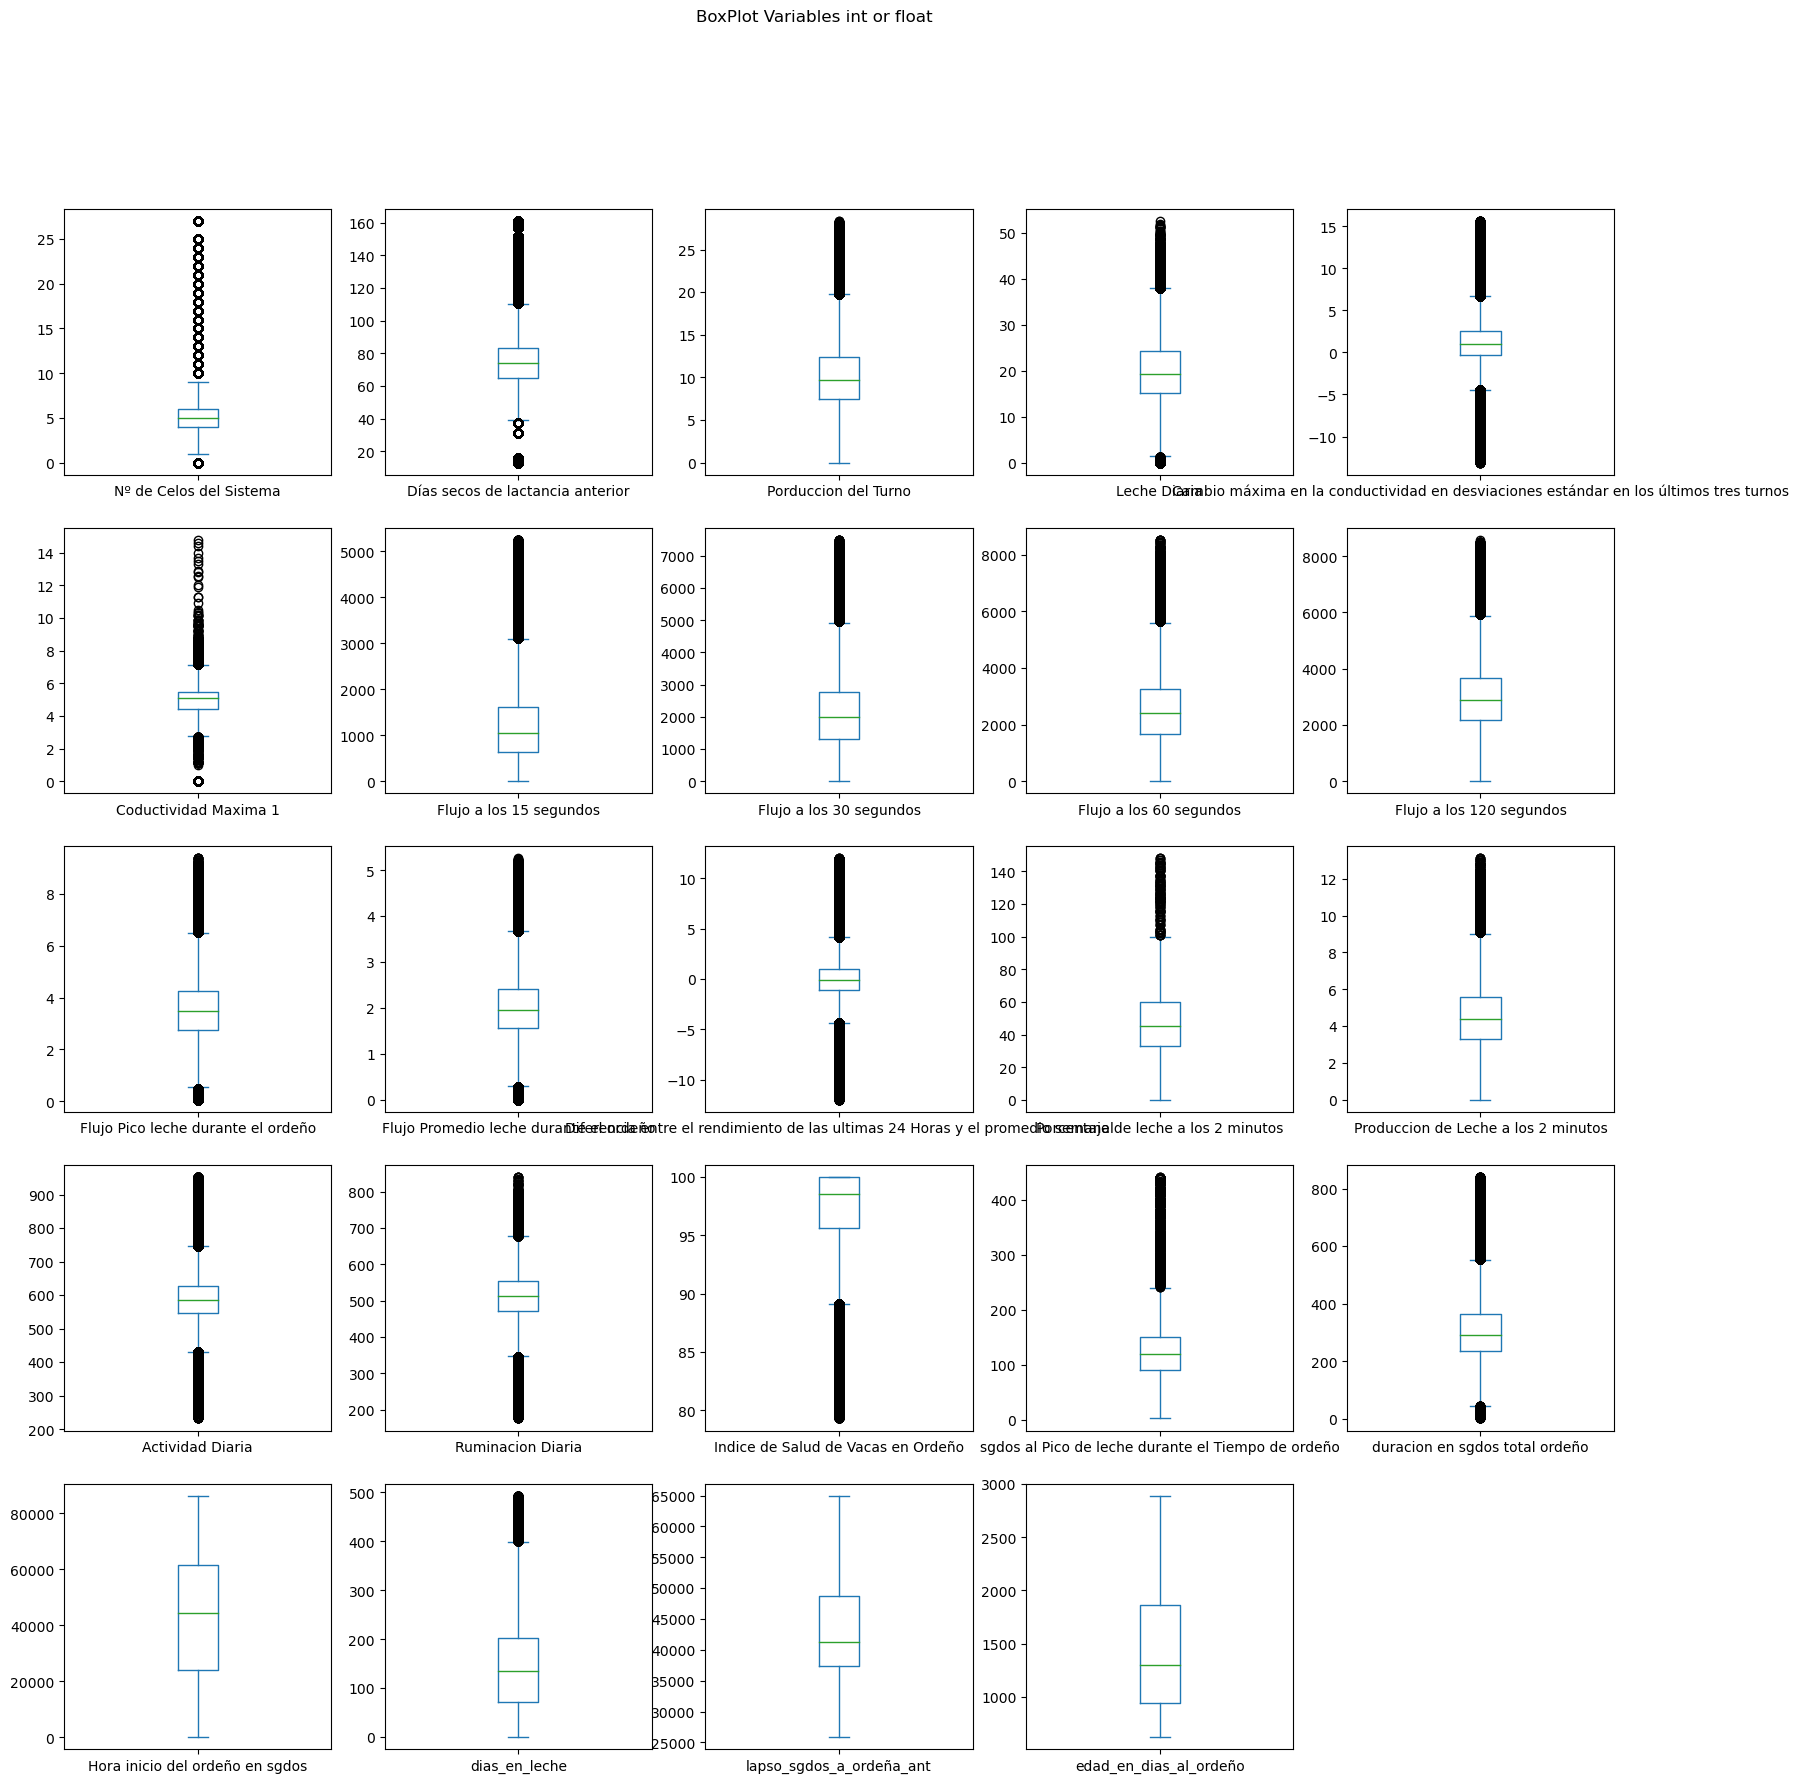

In [192]:
df[cols_checks].plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20), title='BoxPlot Variables int or float')
plt.show()

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


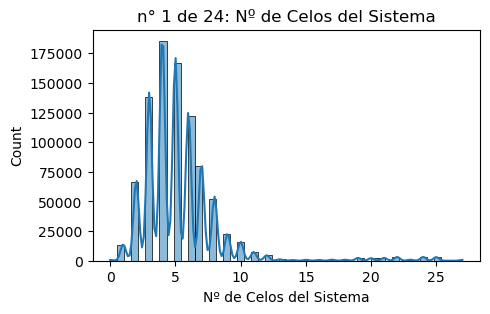

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Nº de Celos del Sistema
 * nans : 0.0%
 * ceros : 0.06999999999999999%
- Minimo : 0.0
- Lim. inf. : 1.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Nº de Celos del Sistema
 * nans : 0.0%
 * ceros : 0.06999999999999999%
+ Maximo: 27.0
+ Lim. super. : 25.0 
 Q indices del target: 0 = nan% del total

Ignorados



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


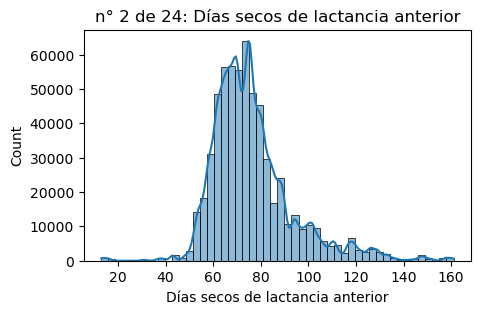

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Días secos de lactancia anterior
 * nans : 31.6%
 * ceros : 0.0%
- Minimo : 13.0
- Lim. inf. : 14.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Días secos de lactancia anterior
 * nans : 31.6%
 * ceros : 0.0%
+ Maximo: 161.0
+ Lim. super. : 160.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


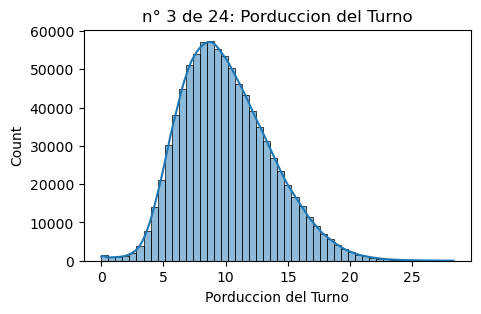

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Porduccion del Turno
 * nans : 0.79%
 * ceros : 0.03%
- Minimo : 0.0
- Lim. inf. : 0.1 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Porduccion del Turno
 * nans : 0.79%
 * ceros : 0.03%
+ Maximo: 28.32
+ Lim. super. : 23.6 
 Q indices del target: 0 = nan% del total

Ignorados



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


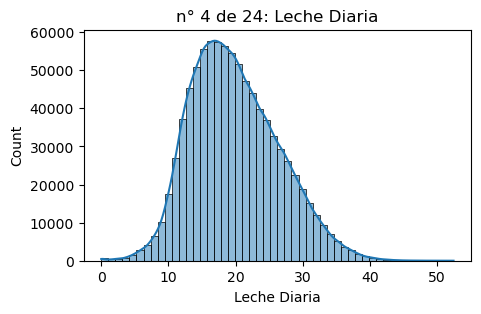

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Leche Diaria
 * nans : 0.0%
 * ceros : 0.02%
- Minimo : 0.0
- Lim. inf. : 1.74 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Leche Diaria
 * nans : 0.0%
 * ceros : 0.02%
+ Maximo: 52.48
+ Lim. super. : 41.8 
 Q indices del target: 0 = nan% del total

Ignorados



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


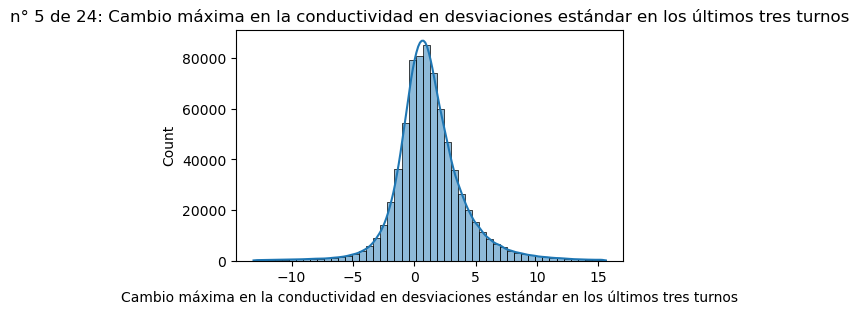

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos
 * nans : 17.919999999999998%
 * ceros : 0.95%
- Minimo : -13.1
- Lim. inf. : -11.71 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos
 * nans : 17.919999999999998%
 * ceros : 0.95%
+ Maximo: 15.6
+ Lim. super. : 14.51 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


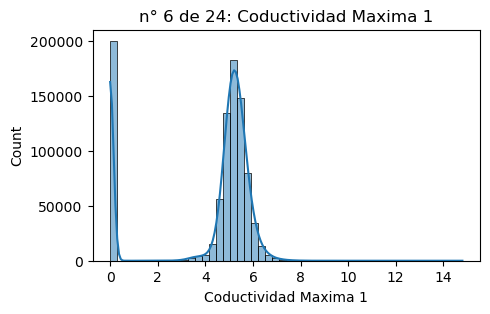

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Coductividad Maxima 1
 * nans : 0.79%
 * ceros : 22.35%
- Minimo : 0.0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Coductividad Maxima 1
 * nans : 0.79%
 * ceros : 22.35%
+ Maximo: 14.8
+ Lim. super. : 7.5 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


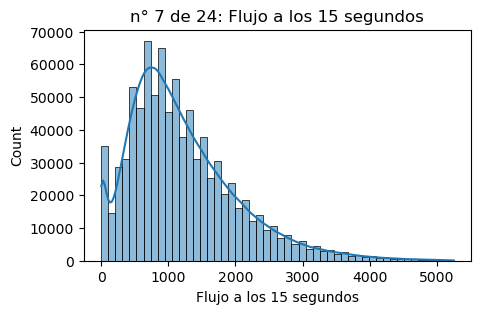

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Flujo a los 15 segundos
 * nans : 1.6199999999999999%
 * ceros : 2.17%
- Minimo : 0.0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Flujo a los 15 segundos
 * nans : 1.6199999999999999%
 * ceros : 2.17%
+ Maximo: 5250.0
+ Lim. super. : 4860.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


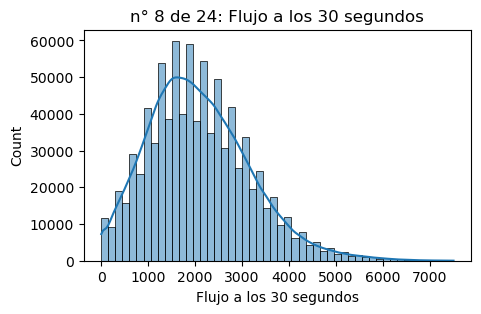

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Flujo a los 30 segundos
 * nans : 1.81%
 * ceros : 0.67%
- Minimo : 0.0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Flujo a los 30 segundos
 * nans : 1.81%
 * ceros : 0.67%
+ Maximo: 7500.0
+ Lim. super. : 6420.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


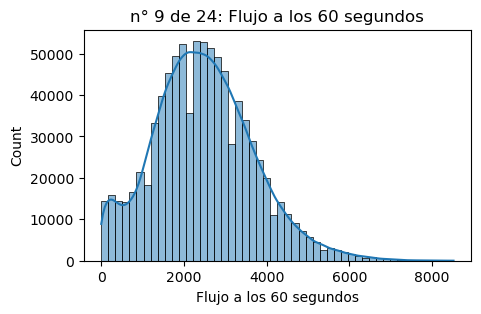

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Flujo a los 60 segundos
 * nans : 2.19%
 * ceros : 0.5499999999999999%
- Minimo : 0.0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Flujo a los 60 segundos
 * nans : 2.19%
 * ceros : 0.5499999999999999%
+ Maximo: 8520.0
+ Lim. super. : 7020.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


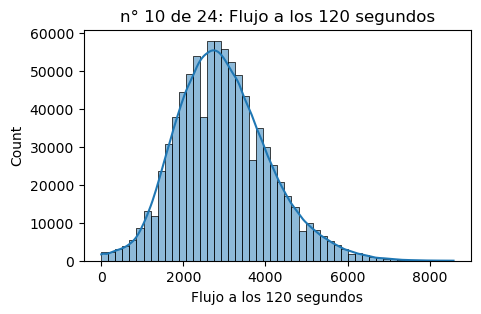

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Flujo a los 120 segundos
 * nans : 3.1199999999999997%
 * ceros : 0.13999999999999999%
- Minimo : 0.0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Flujo a los 120 segundos
 * nans : 3.1199999999999997%
 * ceros : 0.13999999999999999%
+ Maximo: 8580.0
+ Lim. super. : 7200.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


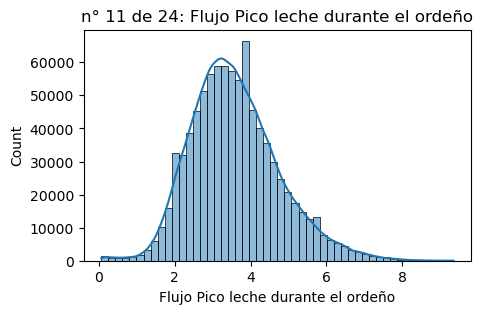

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Flujo Pico leche durante el ordeño
 * nans : 1.02%
 * ceros : 0.0%
- Minimo : 0.06
- Lim. inf. : 0.18 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Flujo Pico leche durante el ordeño
 * nans : 1.02%
 * ceros : 0.0%
+ Maximo: 9.36
+ Lim. super. : 7.98 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
i
Ignorados



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


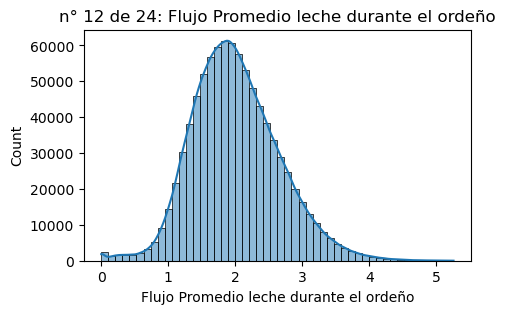

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Flujo Promedio leche durante el ordeño
 * nans : 0.79%
 * ceros : 0.16%
- Minimo : 0.0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Flujo Promedio leche durante el ordeño
 * nans : 0.79%
 * ceros : 0.16%
+ Maximo: 5.26
+ Lim. super. : 4.45 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


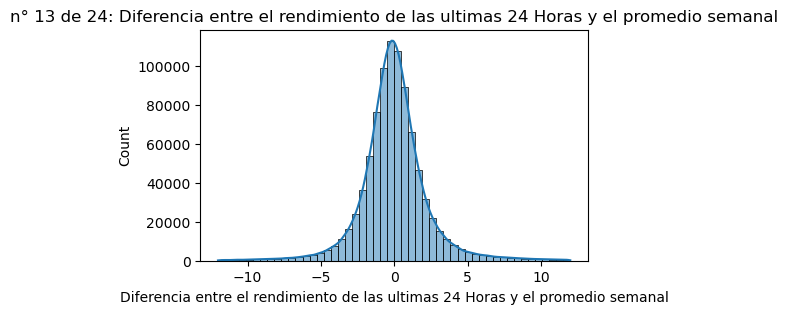

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal
 * nans : 0.61%
 * ceros : 0.01%
- Minimo : -12.01
- Lim. inf. : -10.93 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal
 * nans : 0.61%
 * ceros : 0.01%
+ Maximo: 11.99
+ Lim. super. : 11.22 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


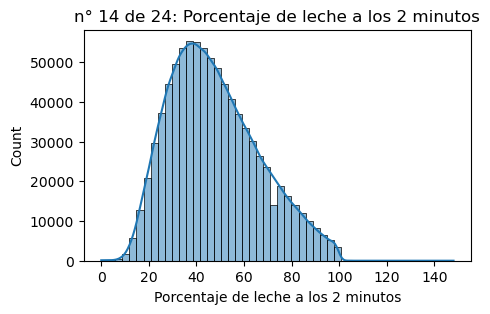

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Porcentaje de leche a los 2 minutos
 * nans : 3.51%
 * ceros : 0.01%
- Minimo : 0.0
- Lim. inf. : 9.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# Porcentaje de leche a los 2 minutos
 * nans : 3.51%
 * ceros : 0.01%
+ Maximo: 148.0
+ Lim. super. : 99.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
r
Reemplazados



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


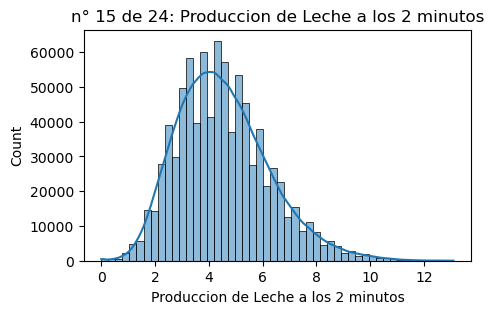

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Produccion de Leche a los 2 minutos
 * nans : 3.49%
 * ceros : 0.04%
- Minimo : 0.0
- Lim. inf. : 0.4 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Produccion de Leche a los 2 minutos
 * nans : 3.49%
 * ceros : 0.04%
+ Maximo: 13.1
+ Lim. super. : 11.1 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


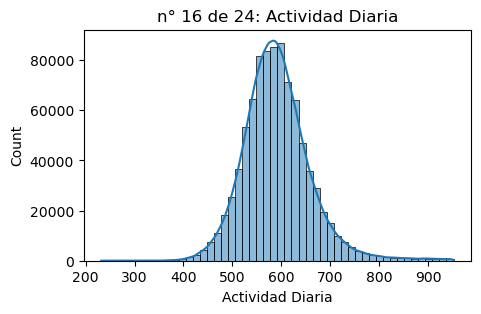

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Actividad Diaria
 * nans : 1.01%
 * ceros : 0.0%
- Minimo : 232.0
- Lim. inf. : 392.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Actividad Diaria
 * nans : 1.01%
 * ceros : 0.0%
+ Maximo: 952.0
+ Lim. super. : 935.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


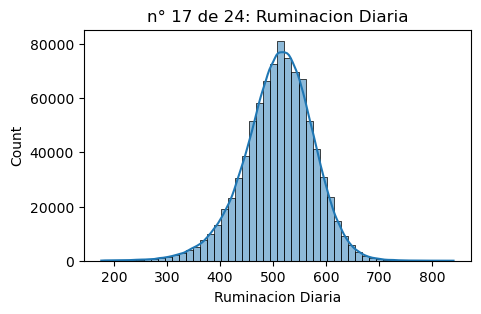

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Ruminacion Diaria
 * nans : 1.01%
 * ceros : 0.0%
- Minimo : 176.0
- Lim. inf. : 239.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Ruminacion Diaria
 * nans : 1.01%
 * ceros : 0.0%
+ Maximo: 840.0
+ Lim. super. : 715.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


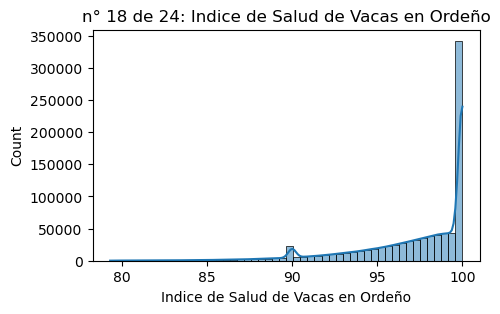

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Indice de Salud de Vacas en Ordeño
 * nans : 0.5%
 * ceros : 0.0%
- Minimo : 79.32
- Lim. inf. : 80.47 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


i
Ignorados

# Indice de Salud de Vacas en Ordeño
 * nans : 0.5%
 * ceros : 0.0%
+ Maximo: 100.0
+ Lim. super. : 100.0 
 Q indices del target: 0 = nan% del total

Ignorados



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


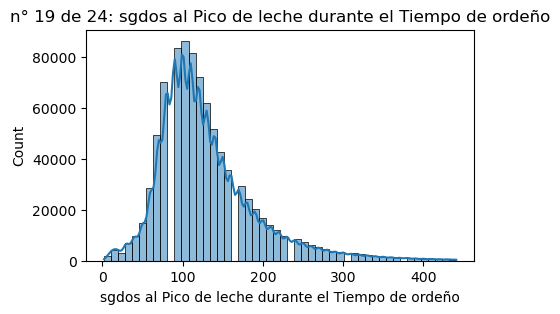

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# sgdos al Pico de leche durante el Tiempo de ordeño
 * nans : 1.02%
 * ceros : 0.0%
- Minimo : 2.0
- Lim. inf. : 8.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# sgdos al Pico de leche durante el Tiempo de ordeño
 * nans : 1.02%
 * ceros : 0.0%
+ Maximo: 441.0
+ Lim. super. : 430.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


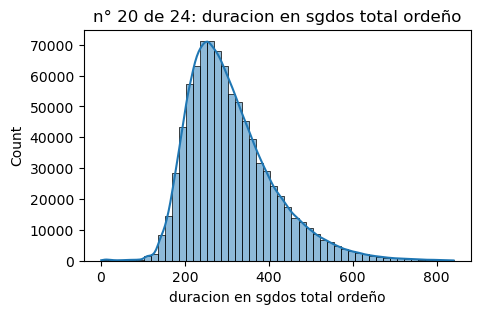

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# duracion en sgdos total ordeño
 * nans : 0.79%
 * ceros : 0.0%
- Minimo : 1.0
- Lim. inf. : 59.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# duracion en sgdos total ordeño
 * nans : 0.79%
 * ceros : 0.0%
+ Maximo: 840.0
+ Lim. super. : 782.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


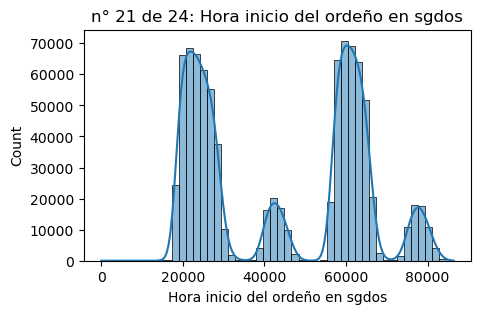

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# Hora inicio del ordeño en sgdos
 * nans : 0.79%
 * ceros : 0.0%
- Minimo : 44.0
- Lim. inf. : 18088.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:52: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


e
Eliminar

# Hora inicio del ordeño en sgdos
 * nans : 0.79%
 * ceros : 0.0%
+ Maximo: 86366.0
+ Lim. super. : 82817.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


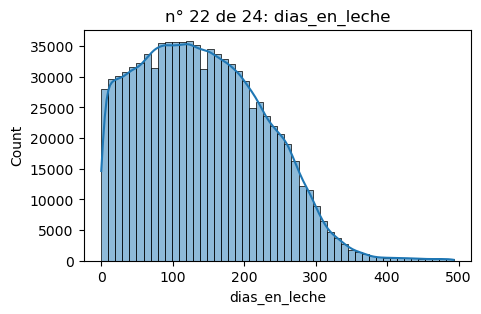

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# dias_en_leche
 * nans : 0.0%
 * ceros : 0.22999999999999998%
- Minimo : 0
- Lim. inf. : 0.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# dias_en_leche
 * nans : 0.0%
 * ceros : 0.22999999999999998%
+ Maximo: 493
+ Lim. super. : 461.0 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


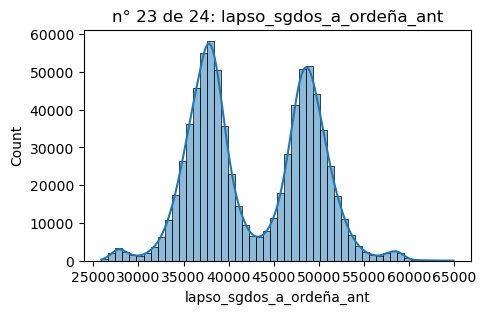

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# lapso_sgdos_a_ordeña_ant
 * nans : 12.72%
 * ceros : 0.0%
- Minimo : 25868.0
- Lim. inf. : 26766.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# lapso_sgdos_a_ordeña_ant
 * nans : 12.72%
 * ceros : 0.0%
+ Maximo: 64975.0
+ Lim. super. : 59665.09 
 Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:106: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


 Q indices del target: 0 = nan% del total
TARGET:0
e
Eliminar



/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


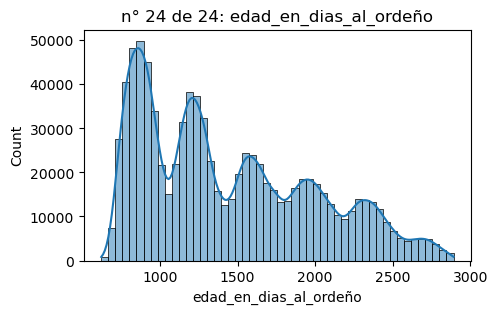

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:41: RuntimeWarning: invalid value encountered in scalar divide
  print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


# edad_en_dias_al_ordeño
 * nans : 0.0%
 * ceros : 0.0%
- Minimo : 622
- Lim. inf. : 669.0 
Q indices del target: 0 = nan% del total



/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_6695/35873537.py:95: RuntimeWarning: invalid value encountered in scalar divide
  print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')


Ignorados

# edad_en_dias_al_ordeño
 * nans : 0.0%
 * ceros : 0.0%
+ Maximo: 2891
+ Lim. super. : 2864.0 
 Q indices del target: 0 = nan% del total

Ignorados



In [195]:
# ESTE ANALISIS SE HACE LUEGO DE OBSERVAR QUE LAS VARIABLES TIENEN UNA DISTRIBUCION NORMAL
qtl_min = 0.0009
qtl_max = 0.9991

df_work = df.copy()
cols = cols_checks

lista_indices_reemplazos_inf2 = []
cols_reemplazos_inf2 = []
lista_indices_nan_inf2 = []
cols_nan_inf2 = []
lista_indices_especial_inf2 = []
cols_especial_inf2 = []

lista_indices_reemplazos_sup2 = []
cols_reemplazos_sup2 = []
lista_indices_nan_sup2 = []
cols_nan_sup2 = []
lista_indices_especial_sup2 = []
cols_especial_sup2 = []

for index, col in enumerate(cols):
    
    plt.figure(figsize=(5,3))
    sns.histplot(data = df_work, x = col, bins=50, kde=True)
    plt.title(f'n° {index+1} de {len(cols)}: {col}')
    plt.show()
#--------------------------------------------------------------------  
    lim_inf = df_work[col].quantile(qtl_min)
    print("#",col)
    print(f' * nans : {round(df_work[df_work[col].isna()].shape[0]/df_work.shape[0],4)*100}%')
    print(f' * ceros : {round(df_work[df_work[col]==0].shape[0]/df_work.shape[0],4)*100}%')
    print("- Minimo :", round(df_work[col].min(), 2))
    print(f"- Lim. inf. : {lim_inf.round(2)} ")
    instancias = df_work[df_work[col]<lim_inf].shape[0]
    indices = df_work[df_work[col]<lim_inf].index.values
    q_target = (df_work.loc[indices, "TIPO DE EVENTO"]=="Mastitis").sum()
    q_total_target = (df["TIPO DE EVENTO"]=="Mastitis").sum()
    minimo = df_work[col].min()
    #print(f'Q indices identificados: {len(indices)}')
    print(f'Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')
    print("")
    
    accion_lim_inf = input(f"* ¿Que hacer con '{instancias}' instancias bajo lim. Inferior '{lim_inf} | minimo:{minimo}' ? : \n [ c = Cambiar | i = Ignorar ] \n ==> '{col}' <== ")
    
    if accion_lim_inf=="c":
        valor = float(input(f'¿Cual es el nuevo valor para ver las instancias bajo el nuevo limite | lim. actual:{lim_inf}?'))
        instancias = df_work[df_work[col]<valor].shape[0]
        indices = df_work[df_work[col]<valor].index.values
        q_target = (df_work.loc[indices, "TIPO DE EVENTO"]=="Mastitis").sum()
        q_total_target = (df["TIPO DE EVENTO"]=="Mastitis").sum()
        print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')
        print(f"TARGET:{q_target}")
        
        accion_lim_inf = input(f"* ¿Que hacer con '{instancias}' instancias bajo lim. Inferior '{valor}' ? : \n [ r = Reemplazar | n = Nan | e = Eliminar | i = Ignorar] \n ==> '{col}' <== ")
        print(accion_lim_inf)

        if accion_lim_inf == "r":
            lista_indices_reemplazos_inf2.append(indices)
            df_work.loc[indices, col ] = valor
            print("Reemplazados")
            cols_reemplazos_inf2.append(col)
            print("")
        elif accion_lim_inf == "n":
            lista_indices_nan_inf2.append(indices)
            df_work.loc[indices, col ] = np.nan
            print("np.nan")
            cols_nan_inf2.append(col)
            print("")
        elif accion_lim_inf == "e":
            lista_indices_especial_inf2.append(indices)
            print("Eliminar")
            cols_especial_inf2.append(col)
            print("")
        else:
            print("Ignorados\n")
    else:
        print("Ignorados\n")
        del(indices)
    #del(indices)
    
#--------------------------------------------------------------------
    lim_sup = df_work[col].quantile(qtl_max)
    print("#",col)
    print(f' * nans : {round(df_work[df_work[col].isna()].shape[0]/df_work.shape[0],4)*100}%')
    print(f' * ceros : {round(df_work[df_work[col]==0].shape[0]/df_work.shape[0],4)*100}%')
    print("+ Maximo:", round(df_work[col].max(),2))
    print(f"+ Lim. super. : {lim_sup.round(2)} ")
    instancias = df_work[df_work[col]>lim_sup].shape[0]
    indices = df_work[df_work[col]>lim_sup].index.values
    q_target = (df_work.loc[indices, "TIPO DE EVENTO"]=="Mastitis").sum()
    q_total_target = (df_work["TIPO DE EVENTO"]=="Mastitis").sum()
    #print(f' Q indices identificados: {len(indices)}')
    maximo = df_work[col].max()
    print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')
    print("")
    
    accion_lim_sup = input(f"* ¿Que hacer con '{instancias}' instancias sobre lim. Superior '{lim_sup}' | maximo:{maximo}? : \n [ c = Cambiar | i = Ignorar] \n ==> '{col}' <== ")
    
    if accion_lim_sup=="c":
        valor = float(input(f'¿Cual es el nuevo valor para ver las instancias sobre el nuevo limite | lim. actual:{lim_sup} ?'))
        instancias = df_work[df_work[col]>valor].shape[0]
        indices = df_work[df_work[col]>valor].index.values
        q_target = (df_work.loc[indices, "TIPO DE EVENTO"]=="Mastitis").sum()
        q_total_target = (df_work["TIPO DE EVENTO"]=="Mastitis").sum()
        print(f' Q indices del target: {q_target} = { round((q_target/q_total_target)*100,2) }% del total')
        print(f"TARGET:{q_target}")
        
        accion_lim_sup = input(f"* ¿Que hacer con '{instancias}' instancias sobre lim. Superior '{valor}' ? : \n [ r = Reemplazar | n = Nan | e = Eliminar | i = Ignorar] \n ==> '{col}' <== ")
        print(accion_lim_sup)
        
        if accion_lim_sup == "r":
            lista_indices_reemplazos_sup2.append(indices)
            df_work.loc[indices, col ] = valor
            print("Reemplazados")
            cols_reemplazos_sup2.append(col)
            print("")
        elif accion_lim_sup == "n":
            lista_indices_nan_sup2.append(indices)
            df_work.loc[indices, col ] = np.nan
            print("np.nan")
            cols_nan_sup2.append(col)
            print("")
        elif accion_lim_sup == "e":
            lista_indices_especial_sup2.append(indices)
            print("Eliminar")
            cols_especial_sup2.append(col)
            print("")
        else:
            print("Ignorados\n")
    else:
        print("Ignorados\n") 
        del(indices)
    #del(indices)

In [196]:
lista_indices_especial_inf2 = [item for sublist in lista_indices_especial_inf2 for item in sublist]
lista_indices_especial_inf2 = set(lista_indices_especial_inf2)
lista_indices_especial_inf2 = list(lista_indices_especial_inf2)
print("N° de indices únicos encontrados a eliminar:", len(lista_indices_especial_inf2))

lista_indices_especial_sup2 = [item for sublist in lista_indices_especial_sup2 for item in sublist]
lista_indices_especial_sup2 = set(lista_indices_especial_sup2)
lista_indices_especial_sup2 = list(lista_indices_especial_sup2)
print("N° de indices únicos encontrados a eliminar:", len(lista_indices_especial_sup2))

lista_indices2 = lista_indices_especial_sup2 + lista_indices_especial_inf2
len(lista_indices2)

N° de indices únicos encontrados a eliminar: 8524
N° de indices únicos encontrados a eliminar: 12014


20538

In [199]:
print(df.shape)
print(df_work.shape)

(896219, 34)
(896219, 34)


In [202]:
df.drop(lista_indices2, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(875819, 34)

## AGREGACION DEL DF MASTITIS (TARGET) AL DF PROCESADO

In [207]:
df_mastitis.drop(cols_eliminar, axis=1, inplace=True)
df_mastitis.drop("index", axis=1, inplace=True)

In [208]:
print(df_mastitis.shape)
print(df.shape)

(1224, 34)
(875819, 34)


In [209]:
print(df.shape)
df2 = pd.concat([df,df_mastitis], axis=0)
df2.reset_index(drop=True, inplace=True)
df2.shape

(875819, 34)


(877043, 34)

In [211]:
cols_checks = df2.select_dtypes(include=["int","float"]).columns.to_list()

cols_no_checks = ["N° de la Vaca",'Nº de Celos del Sistema','Nº de Lactancia','Eventos de Salud del sistema enlos ultimos 365 dias', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE']

cols_checks = [elem for elem in cols_checks if elem not in cols_no_checks]
#  'dias_en_leche','edad_en_dias_al_ordeño'
print(cols_checks)

['Días secos de lactancia anterior', 'Porduccion del Turno', 'Leche Diaria', 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos', 'Coductividad Maxima 1', 'Flujo a los 15 segundos', 'Flujo a los 30 segundos', 'Flujo a los 60 segundos', 'Flujo a los 120 segundos', 'Flujo Pico leche durante el ordeño', 'Flujo Promedio leche durante el ordeño', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal', 'Porcentaje de leche a los 2 minutos', 'Produccion de Leche a los 2 minutos', 'Actividad Diaria', 'Ruminacion Diaria', 'Indice de Salud de Vacas en Ordeño', 'sgdos al Pico de leche durante el Tiempo de ordeño', 'duracion en sgdos total ordeño', 'Hora inicio del ordeño en sgdos', 'dias_en_leche', 'lapso_sgdos_a_ordeña_ant', 'edad_en_dias_al_ordeño']


In [212]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5.5
    mean = df2[col].mean()
    de = df2[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df2[df2[col] > l_s].shape[0]
    lim_inf = df2[df2[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df2[df2[col] > l_s].index
    index_i = df2[df2[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 16 => "c1= 12" y "c2= 4") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 127 => "c1= 5" y "c2= 122") | col: "Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal" 

 Eliminar: 1 => "c

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
0,0,162.700115,0,-10.499758,0,Días secos de lactancia anterior
1,0,29.810138,0,-9.705720,0,Porduccion del Turno
2,0,55.555171,0,-15.784727,0,Leche Diaria
3,16,16.449822,12,-13.947307,4,Cambio máxima en la conductividad en desviacio...
4,0,16.448142,0,-8.279934,0,Coductividad Maxima 1
5,0,5611.750381,0,-3190.541194,0,Flujo a los 15 segundos
6,0,7964.226343,0,-3805.251559,0,Flujo a los 30 segundos
7,0,9069.683609,0,-4100.014094,0,Flujo a los 60 segundos
8,0,9136.903258,0,-3198.874783,0,Flujo a los 120 segundos
9,0,9.882408,0,-2.706011,0,Flujo Pico leche durante el ordeño


In [213]:
print("Q de indices a eliminar:", len(indices))
print(f' Se si aplica una eliminacion adicional por sobre {q} desv. est., se elimina un: {df_resultado["total"].sum() / df2.shape[0] *100}% del df')

Q de indices a eliminar: 182
 Se si aplica una eliminacion adicional por sobre 5.5 desv. est., se elimina un: 0.02827683477320952% del df


In [214]:
print(df2.loc[indices, "TIPO DE EVENTO"].value_counts())
print("")
print((df2["TIPO DE EVENTO"].value_counts() - df2.loc[indices, "TIPO DE EVENTO"].value_counts()) / (df2.shape[0]- df_resultado["total"].sum()) *100)
print("")
int((df2["TIPO DE EVENTO"].value_counts()- df2.loc[indices, "TIPO DE EVENTO"].value_counts()).values) / df2.shape[0] *100

TIPO DE EVENTO
Mastitis    182
Name: count, dtype: int64

TIPO DE EVENTO
Mastitis    0.118842
Name: count, dtype: float64



0.1188083138455013

In [215]:
print(len(indices), ": de estas hay % de NaN en las sgtes cols:")
df2.loc[indices, cols_checks].isna().sum().sort_values(ascending=False) / df2.loc[indices, cols_checks].shape[0] *100

182 : de estas hay % de NaN en las sgtes cols:


Flujo Pico leche durante el ordeño                                                       48.901099
sgdos al Pico de leche durante el Tiempo de ordeño                                       48.901099
Porcentaje de leche a los 2 minutos                                                      41.208791
Produccion de Leche a los 2 minutos                                                      37.362637
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    34.065934
Flujo a los 120 segundos                                                                 34.065934
Flujo a los 60 segundos                                                                  31.868132
Flujo a los 30 segundos                                                                  28.571429
Flujo a los 15 segundos                                                                  28.021978
lapso_sgdos_a_ordeña_ant                                                                 24.725275
Días secos

In [216]:
cols_mask = (df2.loc[indices, cols_checks].isna().sum().sort_values(ascending=False) / df2.loc[indices, cols_checks].shape[0] *100) > 40
cols_mask = cols_mask[cols_mask].index.to_list()
cols_mask

['Flujo Pico leche durante el ordeño',
 'sgdos al Pico de leche durante el Tiempo de ordeño',
 'Porcentaje de leche a los 2 minutos']

In [217]:
print(df2.loc[indices, cols_mask[1]].isna().sum())
indices_mask = df2.loc[indices, cols_mask[1]].isna()
indices_mask = indices_mask[indices_mask].index.to_list()
len(indices_mask)

89


89

In [218]:
print(df2.shape)
df2.drop(indices_mask, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.shape

(877043, 34)


(876954, 34)

In [220]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5.5
    mean = df2[col].mean()
    de = df2[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df2[df2[col] > l_s].shape[0]
    lim_inf = df2[df2[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df2[df2[col] > l_s].index
    index_i = df2[df2[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 11 => "c1= 8" y "c2= 3") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 62 => "c1= 5" y "c2= 57") | col: "Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal" 

 Eliminar: 0 => "c1= 

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
0,0,162.700297,0,-10.500833,0,Días secos de lactancia anterior
1,0,29.806589,0,-9.700963,0,Porduccion del Turno
2,0,55.553691,0,-15.781657,0,Leche Diaria
3,11,16.444604,8,-13.942497,3,Cambio máxima en la conductividad en desviacio...
4,0,16.447317,0,-8.278435,0,Coductividad Maxima 1
5,0,5611.680418,0,-3190.332915,0,Flujo a los 15 segundos
6,0,7963.903098,0,-3804.685755,0,Flujo a los 30 segundos
7,0,9069.222564,0,-4099.259601,0,Flujo a los 60 segundos
8,0,9136.012140,0,-3197.627158,0,Flujo a los 120 segundos
9,0,9.882408,0,-2.706011,0,Flujo Pico leche durante el ordeño


In [221]:
print("Q de indices a eliminar:", len(indices))
print(f' Se si aplica una eliminacion adicional por sobre {q} desv. est., se elimina un: {df_resultado["total"].sum() / df2.shape[0] *100}% del df')

Q de indices a eliminar: 94
 Se si aplica una eliminacion adicional por sobre 5.5 desv. est., se elimina un: 0.014481945461221455% del df


In [222]:
print(df2.loc[indices, "TIPO DE EVENTO"].value_counts())
print("")
print((df2["TIPO DE EVENTO"].value_counts() - df2.loc[indices, "TIPO DE EVENTO"].value_counts()) / (df2.shape[0]- df_resultado["total"].sum()) *100)
print("")
int((df2["TIPO DE EVENTO"].value_counts()- df2.loc[indices, "TIPO DE EVENTO"].value_counts()).values) / df2.shape[0] *100

TIPO DE EVENTO
Mastitis    94
Name: count, dtype: int64

TIPO DE EVENTO
Mastitis    0.118724
Name: count, dtype: float64



0.11870634035536641

In [223]:
print(len(indices), ": de estas hay % de NaN en las sgtes cols:")
df2.loc[indices, cols_checks].isna().sum().sort_values(ascending=False) / df2.loc[indices, cols_checks].shape[0] *100

94 : de estas hay % de NaN en las sgtes cols:


Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    35.106383
Porcentaje de leche a los 2 minutos                                                      28.723404
Produccion de Leche a los 2 minutos                                                      28.723404
Flujo a los 120 segundos                                                                 27.659574
Flujo a los 60 segundos                                                                  23.404255
Días secos de lactancia anterior                                                         20.212766
Flujo a los 15 segundos                                                                  17.021277
Flujo a los 30 segundos                                                                  17.021277
lapso_sgdos_a_ordeña_ant                                                                  9.574468
Ruminacion Diaria                                                                         3.191489
Actividad 

In [224]:
cols_mask = (df2.loc[indices, cols_checks].isna().sum().sort_values(ascending=False) / df2.loc[indices, cols_checks].shape[0] *100) > 30
cols_mask = cols_mask[cols_mask].index.to_list()
cols_mask

['Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos']

In [225]:
print(df2.loc[indices, cols_mask[0]].isna().sum())
indices_mask = df2.loc[indices, cols_mask[0]].isna()
indices_mask = indices_mask[indices_mask].index.to_list()
len(indices_mask)

33


33

In [226]:
print(df2.shape)
df2.drop(indices_mask, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.shape

(876954, 34)


(876921, 34)

#### REVISION DE OUTLIERS POR PERCENTIL CON FOCO EL EN TARGET

In [228]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5.5
    mean = df2[col].mean()
    de = df2[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df2[df2[col] > l_s].shape[0]
    lim_inf = df2[df2[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df2[df2[col] > l_s].index
    index_i = df2[df2[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 11 => "c1= 8" y "c2= 3") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 41 => "c1= 0" y "c2= 41") | col: "Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal" 

 Eliminar: 0 => "c1= 

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
0,0,162.701888,0,-10.502110,0,Días secos de lactancia anterior
1,0,29.805631,0,-9.699928,0,Porduccion del Turno
2,0,55.553161,0,-15.780736,0,Leche Diaria
3,11,16.444604,8,-13.942497,3,Cambio máxima en la conductividad en desviacio...
4,0,16.447173,0,-8.278247,0,Coductividad Maxima 1
5,0,5611.647702,0,-3190.288412,0,Flujo a los 15 segundos
6,0,7963.802228,0,-3804.569045,0,Flujo a los 30 segundos
7,0,9069.081407,0,-4099.094688,0,Flujo a los 60 segundos
8,0,9135.831694,0,-3197.421386,0,Flujo a los 120 segundos
9,0,9.882170,0,-2.705720,0,Flujo Pico leche durante el ordeño


In [229]:
print("Q de indices a eliminar:", len(indices))
print(f' Se si aplica una eliminacion adicional por sobre {q} desv. est., se elimina un: {df_resultado["total"].sum() / df2.shape[0] *100}% del df')
print("")
print(df2.loc[indices, "TIPO DE EVENTO"].value_counts())
print("")
print((df2["TIPO DE EVENTO"].value_counts() - df2.loc[indices, "TIPO DE EVENTO"].value_counts()) / (df2.shape[0]- df_resultado["total"].sum()) *100)
print("")
int((df2["TIPO DE EVENTO"].value_counts()- df2.loc[indices, "TIPO DE EVENTO"].value_counts()).values) / df2.shape[0] *100

Q de indices a eliminar: 61
 Se si aplica una eliminacion adicional por sobre 5.5 desv. est., se elimina un: 0.009807040771061476% del df

TIPO DE EVENTO
Mastitis    61
Name: count, dtype: int64

TIPO DE EVENTO
Mastitis    0.118722
Name: count, dtype: float64



0.11871080747296507

In [230]:
print(len(indices), ": de estas hay % de NaN en las sgtes cols:")
df2.loc[indices, cols_checks].isna().sum().sort_values(ascending=False) / df2.loc[indices, cols_checks].shape[0] *100

61 : de estas hay % de NaN en las sgtes cols:


Flujo a los 120 segundos                                                                 34.426230
Porcentaje de leche a los 2 minutos                                                      34.426230
Produccion de Leche a los 2 minutos                                                      34.426230
Flujo a los 60 segundos                                                                  29.508197
Días secos de lactancia anterior                                                         21.311475
Flujo a los 15 segundos                                                                  21.311475
Flujo a los 30 segundos                                                                  21.311475
Ruminacion Diaria                                                                         4.918033
lapso_sgdos_a_ordeña_ant                                                                  4.918033
Actividad Diaria                                                                          3.278689
dias_en_le

In [231]:
cols_mask = (df2.loc[indices, cols_checks].isna().sum().sort_values(ascending=False) / df2.loc[indices, cols_checks].shape[0] *100) > 30
cols_mask = cols_mask[cols_mask].index.to_list()
cols_mask

['Flujo a los 120 segundos',
 'Porcentaje de leche a los 2 minutos',
 'Produccion de Leche a los 2 minutos']

In [232]:
print(df2.loc[indices, cols_mask[0]].isna().sum())
indices_mask = df2.loc[indices, cols_mask[0]].isna()
indices_mask = indices_mask[indices_mask].index.to_list()
len(indices_mask)

21


21

In [233]:
print(df2.shape)
df2.drop(indices_mask, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.shape

(876921, 34)


(876900, 34)

In [235]:
# VALORES QUE SE ENCUENTRAN SOBRE EL LIMITE EN DESVIACIONES ESTANDAR
data_dict = {'total': [], 'valor_sup':[],'lim_sup': [],'valor_inf':[], 'lim_inf': [], 'col': []}
indices = []

for col in cols_checks:
    q = 5.5
    mean = df2[col].mean()
    de = df2[col].std()
    val = q * de
    l_s = mean + val
    l_i = mean - val
    lim_sup = df2[df2[col] > l_s].shape[0]
    lim_inf = df2[df2[col] < l_i].shape[0]
    total = lim_sup + lim_inf

    data_dict['total'].append(total)
    data_dict['valor_sup'].append(l_s)
    data_dict['lim_sup'].append(lim_sup)
    data_dict['valor_inf'].append(l_i)
    data_dict['lim_inf'].append(lim_inf)
    data_dict['col'].append(col)

    index_s = df2[df2[col] > l_s].index
    index_i = df2[df2[col] < l_i].index
    indices.extend(index_s)
    indices.extend(index_i)

    print(f' Eliminar: {total} => "c1= {lim_sup}" y "c2= {lim_inf}") | col: "{col}" ')
    print("")

indices = list(set(indices))
print("N° de indices unicos a eliminar:", len(indices))

# Crear DataFrame a partir del diccionario
df_resultado = pd.DataFrame(data_dict)
df_resultado

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Días secos de lactancia anterior" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Porduccion del Turno" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Leche Diaria" 

 Eliminar: 9 => "c1= 7" y "c2= 2") | col: "Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Coductividad Maxima 1" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 15 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 30 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 60 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo a los 120 segundos" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Pico leche durante el ordeño" 

 Eliminar: 0 => "c1= 0" y "c2= 0") | col: "Flujo Promedio leche durante el ordeño" 

 Eliminar: 26 => "c1= 0" y "c2= 26") | col: "Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal" 

 Eliminar: 0 => "c1= 0

,total,valor_sup,lim_sup,valor_inf,lim_inf,col
0,0,162.702811,0,-10.502877,0,Días secos de lactancia anterior
1,0,29.804551,0,-9.698422,0,Porduccion del Turno
2,0,55.552803,0,-15.779947,0,Leche Diaria
3,9,16.442813,7,-13.940792,2,Cambio máxima en la conductividad en desviacio...
4,0,16.447064,0,-8.278094,0,Coductividad Maxima 1
5,0,5611.642172,0,-3190.280738,0,Flujo a los 15 segundos
6,0,7963.779729,0,-3804.541218,0,Flujo a los 30 segundos
7,0,9069.062862,0,-4099.061163,0,Flujo a los 60 segundos
8,0,9135.831694,0,-3197.421386,0,Flujo a los 120 segundos
9,0,9.881886,0,-2.705317,0,Flujo Pico leche durante el ordeño


In [236]:
cols_ver = df_resultado[ (df_resultado["total"]>0)]["col"].to_list()
cols_ver

['Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos',
 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
 'Indice de Salud de Vacas en Ordeño',
 'sgdos al Pico de leche durante el Tiempo de ordeño',
 'duracion en sgdos total ordeño']

In [237]:
for col in cols_ver:
    print(f'--{col}--')
    q_inf = df2[col].quantile(0.0001)
    q_sup = df2[col].quantile(0.9999)
    minimo = df2[col].min()
    maximo = df2[col].max()
    print("minimo:",minimo)
    print("Q de target en q_inf: *",(df2[df2[col]<q_inf]["TIPO DE EVENTO"]=="Mastitis").sum(), "* / valor lim:", q_inf)
    print("Valores inferiores:",df2[ (df2[col]<q_inf) & (df2["TIPO DE EVENTO"]=="Mastitis")][col].sort_values().values[:5])
    print("maximo:", maximo)
    print("Q de target en q_sup: *",(df2[df2[col]>q_sup]["TIPO DE EVENTO"]=="Mastitis").sum(), "* / valor lim:", q_sup)
    print("Valores superiores:",df2[ (df2[col]>q_sup) & (df2["TIPO DE EVENTO"]=="Mastitis")][col].sort_values().values[-5:])
    print("")

--Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos--
minimo: -15.333333333333332
Q de target en q_inf: * 3 * / valor lim: -11.874682555658444
Valores inferiores: [-15.33333333 -14.67661692 -12.23083549]
maximo: 30.446194225721776
Q de target en q_sup: * 9 * / valor lim: 14.91941753952006
Valores superiores: [18.6440678  19.9628598  19.9628598  23.27443273 30.44619423]

--Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal--
minimo: -20.657
Q de target en q_inf: * 55 * / valor lim: -10.955626085714286
Valores inferiores: [-20.657      -19.42285714 -19.17414286 -19.13828571 -18.86014286]
maximo: 12.18
Q de target en q_sup: * 1 * / valor lim: 11.419999999999998
Valores superiores: [12.18]

--Indice de Salud de Vacas en Ordeño--
minimo: 71.9729754216969
Q de target en q_inf: * 24 * / valor lim: 79.43761636374585
Valores inferiores: [71.97297542 72.65380016 72.95404864 74.08166646 75.07071466]
maximo: 100.0
Q de target en q_sup:

In [238]:
for col in cols_ver:
    print(f'--{col}--')
    q_inf = df2[col].quantile(0.0001)
    q_sup = df2[col].quantile(0.9999)

    df2.loc[ df2[col]<q_inf, col] = q_inf
    df2.loc[ df2[col]>q_sup, col] = q_sup

--Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos--
--Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal--
--Indice de Salud de Vacas en Ordeño--
--sgdos al Pico de leche durante el Tiempo de ordeño--
--duracion en sgdos total ordeño--


Días secos de lactancia anterior


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


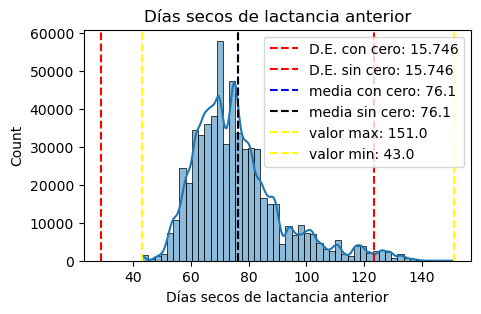

Porduccion del Turno


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


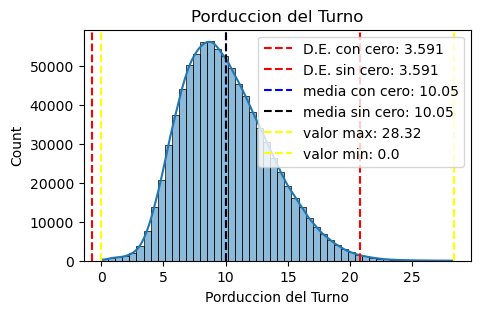

Leche Diaria


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


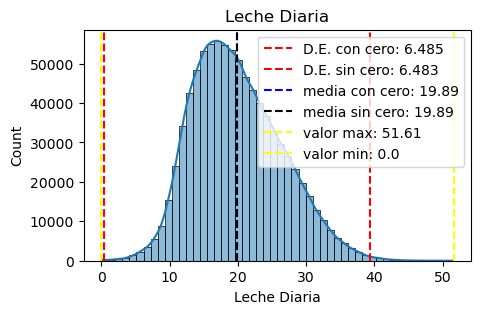

Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


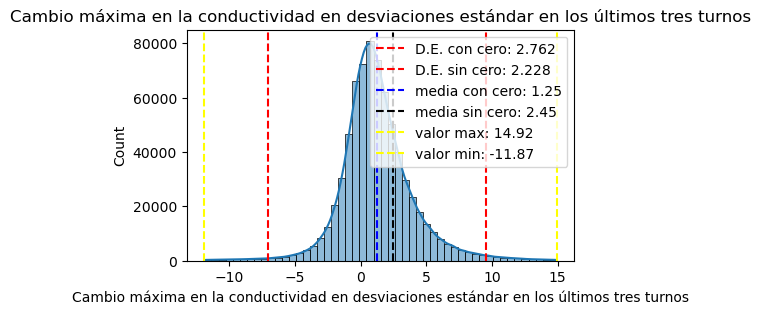

Coductividad Maxima 1


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


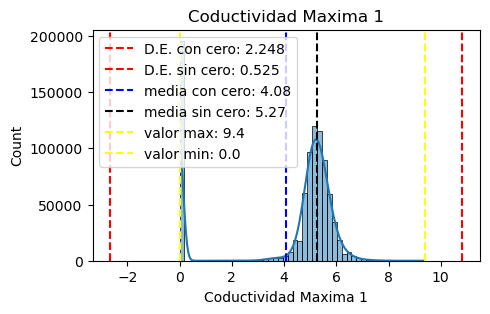

Flujo a los 15 segundos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


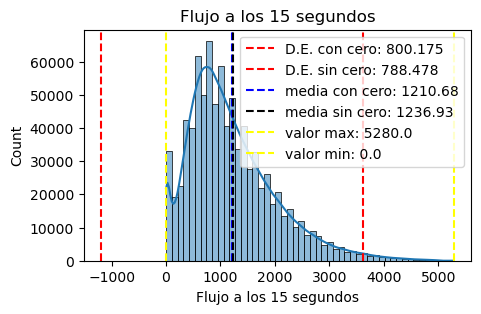

Flujo a los 30 segundos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


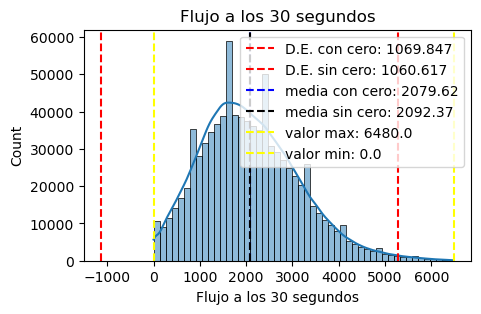

Flujo a los 60 segundos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


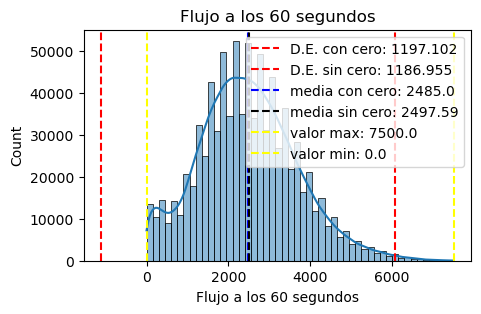

Flujo a los 120 segundos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


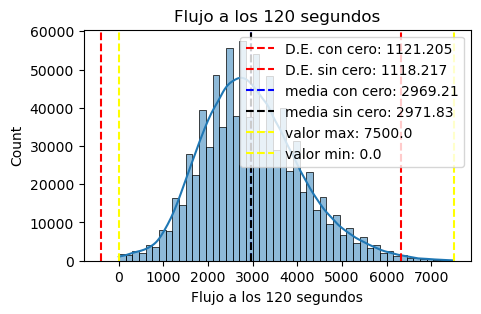

Flujo Pico leche durante el ordeño


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


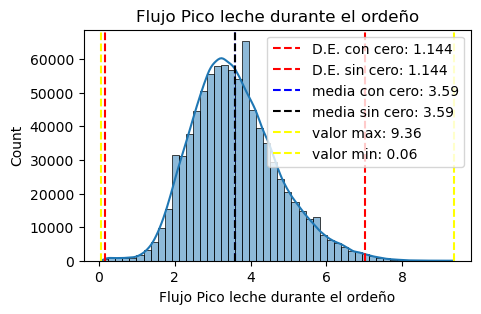

Flujo Promedio leche durante el ordeño


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


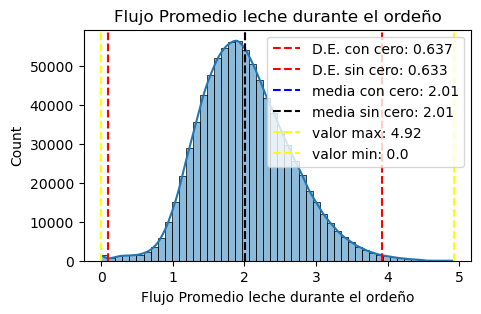

Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


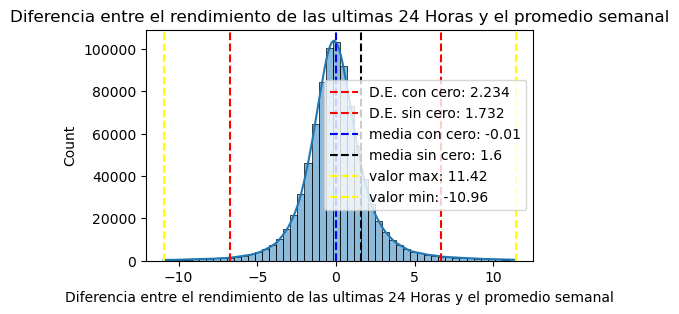

Porcentaje de leche a los 2 minutos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


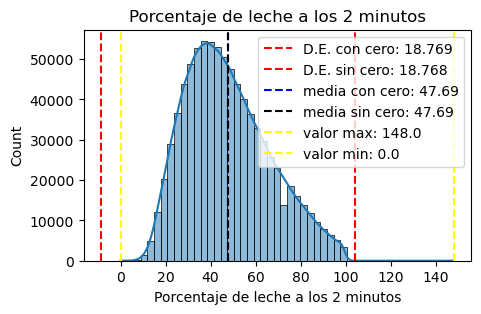

Produccion de Leche a los 2 minutos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


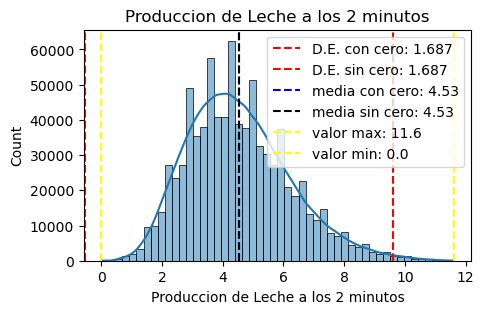

Actividad Diaria


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


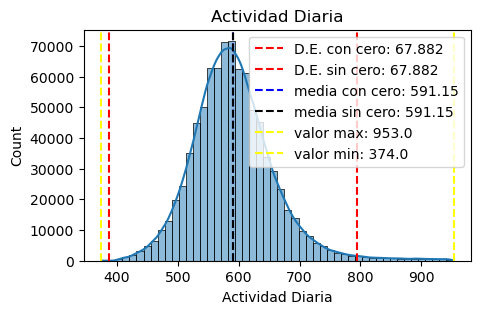

Ruminacion Diaria


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


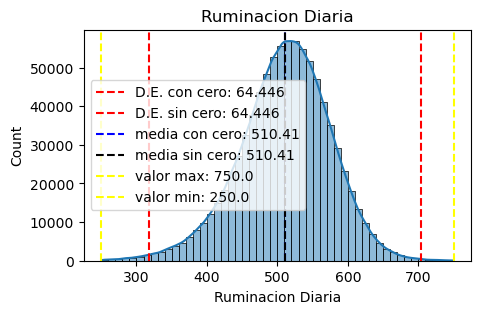

Indice de Salud de Vacas en Ordeño


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


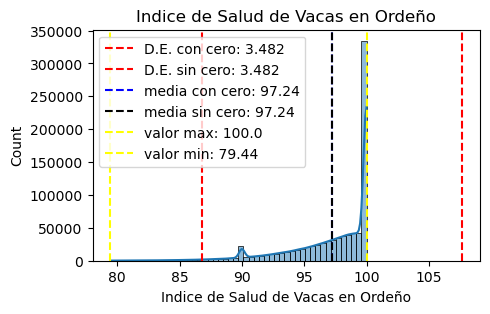

sgdos al Pico de leche durante el Tiempo de ordeño


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


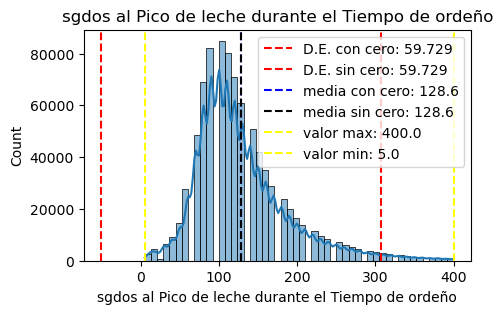

duracion en sgdos total ordeño


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


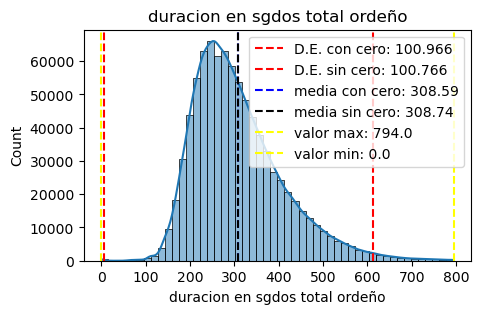

Hora inicio del ordeño en sgdos


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


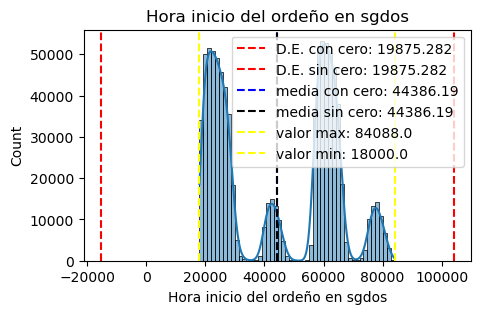

dias_en_leche


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


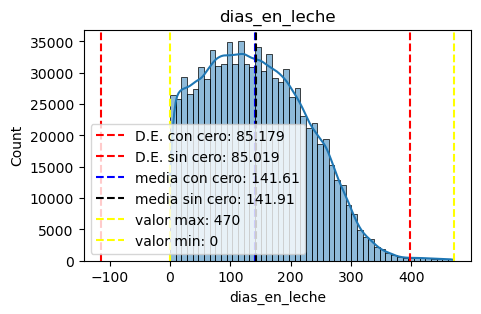

lapso_sgdos_a_ordeña_ant


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


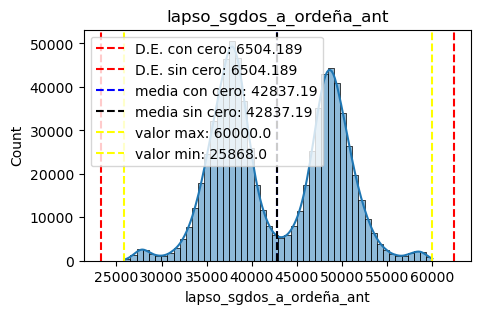

edad_en_dias_al_ordeño


/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


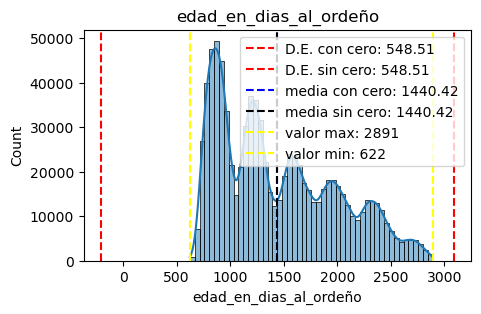

In [239]:
for i in cols_checks:
    print(i)
    media = df2[i].mean()
    maximo = df2[i].max()
    minimo = df2[i].min()
    media_sc = df2[df2[i]>0][i].mean()
    de = df2[i].std()
    de_sc = df2[df2[i]>0][i].std()
    lim_sup = media + (3 * de)
    lim_inf = media - (3 * de)
    
    plt.figure(figsize=(5,3))
    sns.histplot(data = df2, x=i, bins=50, kde=True)       
    plt.axvline(lim_sup, color='red', linestyle='--', label= f'D.E. con cero: {round(de,3)}')#f'+ 3 sd: {lim_sup.round(2)}'
    plt.axvline(lim_inf, color='red', linestyle='--', label= f'D.E. sin cero: {round(de_sc,3)}')#f'- 3 sd: {lim_inf.round(2)}'
    plt.axvline(media, color='blue', linestyle='--', label= f'media con cero: {round(media,2)}')
    plt.axvline(media_sc, color='black', linestyle='--', label= f'media sin cero: {round(media_sc,2)}')
    plt.axvline(maximo, color='yellow', linestyle='--', label= f'valor max: {round(maximo,2)}')
    plt.axvline(minimo, color='yellow', linestyle='--', label= f'valor min: {round(minimo,2)}')
    plt.title(f'{i}')
    plt.legend()
    plt.show()

In [242]:
df2.groupby([df2["Fecha_dia"].dt.year, df2["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       10           21133
           11           23681
           12           26958
2022       1            28194
           2            24887
           3            28612
           4            27137
           5            21562
           6            14271
           7            11883
           8            21275
           9            24122
           10           31245
           11           35231
           12           38202
2023       1            39196
           2            36027
           3            39402
           4            37463
           5            32447
           6            19767
           7            14138
           8            23326
           9            31986
           10           39626
           11           41710
           12           43769
2024       1            44675
           2            40545
           3            14430
dtype: int64

In [246]:
indices = df2[df2["Porcentaje de leche a los 2 minutos"]>100].index
print("Q de indices:", len(indices))
df2.loc[indices, "Porcentaje de leche a los 2 minutos"] = 100

Q de indices: 122


In [247]:
df2[df2["Porcentaje de leche a los 2 minutos"]>100]

,Fecha_dia,N° de la Vaca,Nº de Celos del Sistema,Días secos de lactancia anterior,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Lactancia,Turno,Porduccion del Turno,Leche Diaria,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo Pico leche durante el ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Actividad Diaria,Ruminacion Diaria,Indice de Salud de Vacas en Ordeño,Eventos de Salud del sistema enlos ultimos 365 dias,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Hora inicio del ordeño en sgdos,dias_en_leche,lapso_sgdos_a_ordeña_ant,edad_en_dias_al_ordeño


In [ ]:
# Parece bien el resulado final, por lo tanto es prudente exportar el archivo a EXCEL para conservarlo desde aquí.

## REORDENAMIENTO DE LAS COLUMNAS EN UNA FORMA COHERENTE Y CONEXA

In [250]:
print(df2.columns.to_list())
print(df2.shape)

['Fecha_dia', 'N° de la Vaca', 'Nº de Celos del Sistema', 'Días secos de lactancia anterior', 'Fecha del Ultimo Parto_lac', 'Modo del Ultimo  Parto', 'Nº de Lactancia', 'Turno', 'Porduccion del Turno', 'Leche Diaria', 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos', 'Coductividad Maxima 1', 'Flujo a los 15 segundos', 'Flujo a los 30 segundos', 'Flujo a los 60 segundos', 'Flujo a los 120 segundos', 'Flujo Pico leche durante el ordeño', 'Flujo Promedio leche durante el ordeño', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal', 'Porcentaje de leche a los 2 minutos', 'Produccion de Leche a los 2 minutos', 'Actividad Diaria', 'Ruminacion Diaria', 'Indice de Salud de Vacas en Ordeño', 'Eventos de Salud del sistema enlos ultimos 365 dias', 'TIPO DE EVENTO', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE', 'sgdos al Pico de leche durante el Tiempo de ordeño', 'duracion en sgdos total ordeño', 'Hora inicio del ordeño en 

In [251]:
cols_eliminar = ['Produccion de Leche a los 2 minutos',
                 'Flujo a los 120 segundos',
                 'Flujo a los 30 segundos']

In [253]:
df2[cols_eliminar].isna().sum() / df2.shape[0] *100

Produccion de Leche a los 2 minutos    3.283613
Flujo a los 120 segundos               2.941270
Flujo a los 30 segundos                1.675790
dtype: float64

In [254]:
cols_order = [ 'Fecha_dia','edad_en_dias_al_ordeño',
              
              'Días secos de lactancia anterior',
              
              'N° de la Vaca', 'Nº de Lactancia','dias_en_leche','Fecha del Ultimo Parto_lac','Modo del Ultimo  Parto',
              
              'Nº de Celos del Sistema',
              
              'Turno','lapso_sgdos_a_ordeña_ant', 'Hora inicio del ordeño en sgdos',
              
              'Leche Diaria','Porduccion del Turno', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
              
              'Produccion de Leche a los 2 minutos', 'Porcentaje de leche a los 2 minutos', 
              
              'sgdos al Pico de leche durante el Tiempo de ordeño','duracion en sgdos total ordeño',
              
              'Flujo a los 15 segundos', 'Flujo a los 30 segundos','Flujo a los 60 segundos', 'Flujo a los 120 segundos',
              
              'Flujo Promedio leche durante el ordeño', 'Flujo Pico leche durante el ordeño', 
              
              'Coductividad Maxima 1',

              'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos',
              
              'Eventos de Salud del sistema enlos ultimos 365 dias',
              
              'Indice de Salud de Vacas en Ordeño','Actividad Diaria', 'Ruminacion Diaria',
              
              'TIPO DE EVENTO', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE']

In [256]:
print("Q de columnas:", len(cols_order))

Q de columnas: 34


In [257]:
[col for col in df2.columns.to_list() if col not in cols_order]

[]

In [258]:
df2[cols_order].head(5)

,Fecha_dia,edad_en_dias_al_ordeño,Días secos de lactancia anterior,N° de la Vaca,Nº de Lactancia,dias_en_leche,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Celos del Sistema,Turno,lapso_sgdos_a_ordeña_ant,Hora inicio del ordeño en sgdos,Leche Diaria,Porduccion del Turno,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Produccion de Leche a los 2 minutos,Porcentaje de leche a los 2 minutos,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo Promedio leche durante el ordeño,Flujo Pico leche durante el ordeño,Coductividad Maxima 1,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Eventos de Salud del sistema enlos ultimos 365 dias,Indice de Salud de Vacas en Ordeño,Actividad Diaria,Ruminacion Diaria,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE
0,2021-10-01,2726,70.0,6281046,6.0,6,2021-09-25,Facil,3.0,Manana,NaN,20428.0,31.320000,16.910000,5.940000,5.4,32.0,190.0,375.0,1800.0,2340.0,3180.0,3600.0,2.705600,4.08,5.0,NaN,4.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,2726,70.0,6281046,6.0,6,2021-09-25,Facil,3.0,Tarde,39326.0,59754.0,31.320000,14.410000,10.454000,6.0,41.0,170.0,330.0,1470.0,2760.0,3780.0,2940.0,2.620000,4.14,4.4,NaN,4.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2021-10-02,2727,70.0,6281046,6.0,7,2021-09-25,Facil,3.0,Manana,47842.0,21196.0,30.360001,16.629999,6.792000,5.4,32.0,110.0,357.0,1830.0,3060.0,3300.0,3420.0,2.794958,4.38,5.1,NaN,4.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2021-10-02,2727,70.0,6281046,6.0,7,2021-09-25,Facil,3.0,Tarde,38406.0,59602.0,30.360001,13.730000,7.751667,5.5,40.0,150.0,298.0,1440.0,2640.0,3120.0,3780.0,2.764430,4.08,4.4,NaN,4.0,90.0,NaN,NaN,NaN,NaN,NaN
4,2021-10-03,2728,70.0,6281046,6.0,8,2021-09-25,Facil,3.0,Manana,47405.0,20607.0,29.660000,14.920000,3.270000,5.3,35.0,180.0,300.0,1350.0,1920.0,3360.0,3240.0,2.984000,4.20,0.0,NaN,4.0,90.0,NaN,NaN,NaN,NaN,NaN


In [259]:
df_cols_order = df2[cols_order].copy()

In [260]:
(df_cols_order.isna().sum()  / df_cols_order.shape[0] *100).sort_values(ascending=False)

PERÍODO DE RESGUARDO LECHE                                                               99.926788
DIAS DE TRATAMIENTO                                                                      99.906831
TIPO DE EVENTO                                                                           99.876725
Días secos de lactancia anterior                                                         31.895427
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    17.722317
lapso_sgdos_a_ordeña_ant                                                                 12.627552
Modo del Ultimo  Parto                                                                    5.602463
Porcentaje de leche a los 2 minutos                                                       3.284525
Produccion de Leche a los 2 minutos                                                       3.283613
Flujo a los 120 segundos                                                                  2.941270
Flujo a lo

## EXPORTACION DEL ARCHIVO LUEGO DE LA LIMPIEZA

##### SIN VALORES EXTREMOS NI COLUMNAS CON EXCESIVAS CANTIDADES DE VALORES NAN

In [261]:
df_cols_order.shape

(876900, 34)

In [262]:
print(df_cols_order["TIPO DE EVENTO"].value_counts() / df_cols_order.shape[0] *100)

df_cols_order["TIPO DE EVENTO"].value_counts()

TIPO DE EVENTO
Mastitis    0.123275
Name: count, dtype: float64


TIPO DE EVENTO
Mastitis    1081
Name: count, dtype: int64

In [263]:
print(os.getcwd())
os.listdir()

/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2


['df_preprocesado_target_real_knn_code2.csv',
 'df_feature_selection_code2.csv',
 'df_con_movil_diff_imputed.csv',
 'df_sample_imputed_knn_code2.csv',
 '.DS_Store',
 'df_preprocesado_target_real_knn.csv',
 'df_feature_selection.csv',
 'df_sample_knn.csv',
 'df_preprocesado_target_real_con_nan.csv',
 'df_con_target_and_cols_utils.csv',
 'df_sample_original_con_nan.csv',
 'df_preprocesado_target_real_code2.csv']

In [264]:
df_cols_order.to_csv("df_preprocesado_target_real_code2.csv", sep=";", decimal= ",", date_format= '%Y-%m-%d', float_format='%.6f')